In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from itertools import combinations
from sklearn.decomposition import PCA

In [9]:
pxt=[(x) for x in list(range(3,50,1))]
neh=range(1,120)

In [10]:
[px for px in pxt]

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [2]:
ph=1.5574E-4
times=[1,2,3,6,7,9,13,16,21,24,31] 

In [3]:
path="C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/"
pept=[x.split('_1_')[0] for x in os.listdir(path) if ((".csv" in x) and ("_1_" in x)) ]

In [4]:
protien="FAS_MOUSE"

In [37]:
time=31
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[6]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

# data3=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[2]}_{31}_{protien}.csv")
# data3=data1[["NEH","pxt","RMSE"]]
# data3.head()


temp=pd.merge(data1,data2,how="cross")
temp=temp[temp.pxt_x==temp.pxt_y]
temp["RMSE"]=temp.RMSE_x+ temp.RMSE_y
temp=temp[["pxt_x","NEH_x","NEH_y","RMSE"]]
temp=temp.sort_values(by="RMSE")
temp.tail(123)

36 113
18 79


,pxt_x,NEH_x,NEH_y,RMSE
280081,0.004,2,5,0.297487
5953,0.004,1,6,0.297492
1376593,0.004,6,1,0.297492
31530095,0.050,115,116,0.297526
31804223,0.050,116,115,0.297526
...,...,...,...,...
32626847,0.050,119,117,0.301245
32352719,0.050,118,118,0.301255
32626895,0.050,119,118,0.301922
32352767,0.050,118,119,0.301922


In [54]:
# temp=pd.merge(temp,data3,how="cross")
# # temp=temp[temp.pxt_x==temp.pxt_y]
# # temp["RMSE"]=temp.RMSE_x+ temp.RMSE_y
# # temp=temp[["pxt_x","NEH_x","NEH_y","RMSE"]]
# temp

In [20]:
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[6]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt"]]

temp=pd.merge(data1,data2,how="cross")
temp=temp[temp.pxt_x==temp.pxt_y]
temp=temp[["pxt_x","NEH_x","NEH_y"]]
temp


36 113
18 79


,pxt_x,NEH_x,NEH_y
0,0.003,1,1
48,0.003,1,2
96,0.003,1,3
144,0.003,1,4
192,0.003,1,5
...,...,...,...
32626751,0.050,119,115
32626799,0.050,119,116
32626847,0.050,119,117
32626895,0.050,119,118


In [5]:
time=31
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[0]}_{time}_{protien}.csv")
print(data1["T_NEH"][0],data1["NH"][0])
data1=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[1]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[2]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

data2=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[3]}_{time}_{protien}.csv")
print(data2["T_NEH"][0],data2["NH"][0])
data2=data1[["NEH","pxt","RMSE"]]

23 107
37 154
26 97
36 113


In [81]:
pxt=[(x/1000) for x in list(range(3,50,1))]
neh=range(1,120)

In [82]:
res=[]
for px in pxt:
    
    for n1 in neh:
        rmse1= float(data1[(data1.pxt==px)&(data1.NEH==n1)].RMSE)
        
        for n2 in neh:                
            rmse2= float(data2[(data2.pxt==px)&(data2.NEH==n2)].RMSE)
            res.append([px,n1,n2,(rmse1+rmse2)])
            
#             for n3 in neh:                
#                 rmse3= float(data1[(data1.pxt==px)&(data1.NEH==n3)].RMSE)
#                 res.append([px,n1,n2,n3,(rmse1+rmse2+rmse3)])

TypeError: cannot convert the series to <class 'float'>

In [ ]:
np.array(res).shape

In [65]:
float(data1[(data1.pxt==0.01)&(data1.NEH==1)].RMSE)

0.140276869861247

In [6]:
data1[data1.pxt==0.006].RMSE

Series([], Name: RMSE, dtype: float64)

In [124]:
data1=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pept[0]}_{time}_{protien}.csv")
# data1[data1.pxt==0.006].RMSE
data1.query("pxt>0.06")

,NEH,pxt,RMSE,theo_A1/A0,exp_A1/A0,theo_t_A1/A0,exp_t_A1/A0,NH,T_NEH,ria_0,ria_t


In [120]:
data1.pxt

0       0.003
1       0.004
2       0.005
3       0.006
4       0.007
        ...  
5707    0.046
5708    0.047
5709    0.048
5710    0.049
5711    0.050
Name: pxt, Length: 5712, dtype: float64


 _AGGVTVSYFEWLK_2 Time 1 ==================================>


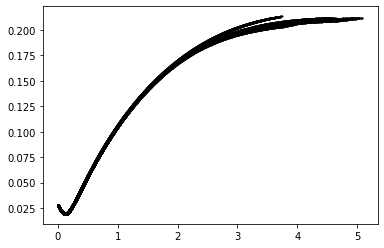

pxt*NEH = 0.123 real_NEH= 17 ratio = 0.0072352941176470585 

vals 0.06743107317301908

 _AGGVTVSYFEWLK_2 Time 2 ==================================>


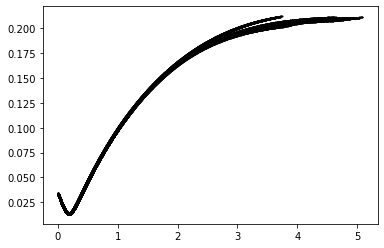

pxt*NEH = 0.186 real_NEH= 17 ratio = 0.010941176470588235 

vals 0.19346954519201015

 _AGGVTVSYFEWLK_2 Time 3 ==================================>


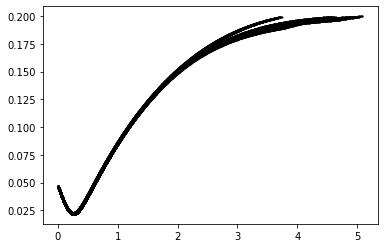

pxt*NEH = 0.261 real_NEH= 17 ratio = 0.015352941176470588 

vals 0.15171838976986243

 _AGGVTVSYFEWLK_2 Time 6 ==================================>


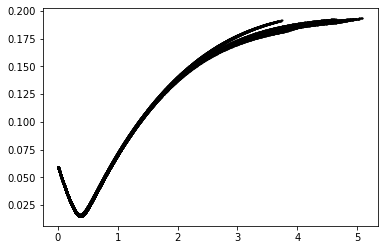

pxt*NEH = 0.37370000000000003 real_NEH= 17 ratio = 0.021982352941176474 

vals 0.27868107390237085

 _AGGVTVSYFEWLK_2 Time 7 ==================================>


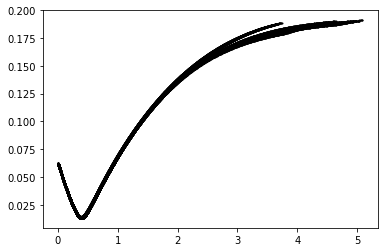

pxt*NEH = 0.393900101 real_NEH= 17 ratio = 0.023170594176470587 

vals 0.38351667774977943

 _AGGVTVSYFEWLK_2 Time 9 ==================================>


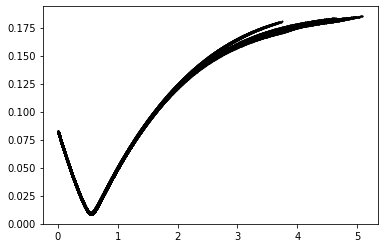

pxt*NEH = 0.550799796 real_NEH= 17 ratio = 0.032399988 

vals 0.5295348788473049

 _AGGVTVSYFEWLK_2 Time 13 ==================================>


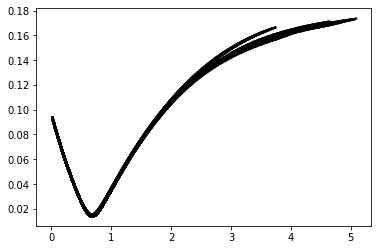

pxt*NEH = 0.673199592 real_NEH= 17 ratio = 0.039599976 

vals 0.5416442359822473

 _AGGVTVSYFEWLK_2 Time 16 ==================================>


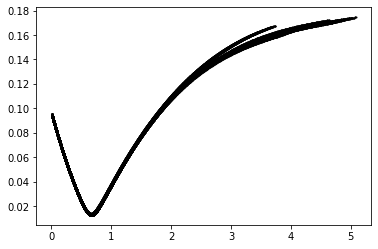

pxt*NEH = 0.6674994000000001 real_NEH= 17 ratio = 0.039264670588235295 

vals 0.7146092514708441

 _AGGVTVSYFEWLK_2 Time 21 ==================================>


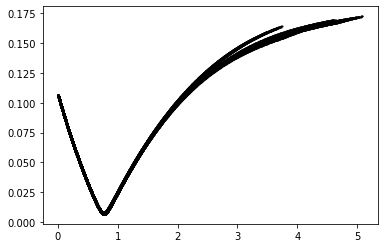

pxt*NEH = 0.76959926 real_NEH= 17 ratio = 0.045270544705882355 

vals 0.7699373708764583

 _AGGVTVSYFEWLK_2 Time 24 ==================================>


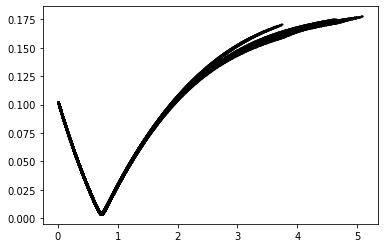

pxt*NEH = 0.72419949 real_NEH= 17 ratio = 0.042599969999999994 

vals 0.7223686518188808

 _AGGVTVSYFEWLK_2 Time 31 ==================================>


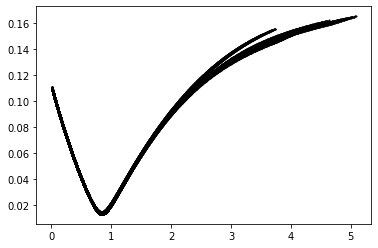

pxt*NEH = 0.846599286 real_NEH= 17 ratio = 0.049799958 

vals 0.6564606139326462

 [0.123, 0.186, 0.261, 0.37370000000000003, 0.393900101, 0.550799796, 0.673199592, 0.6674994000000001, 0.76959926, 0.72419949, 0.846599286]


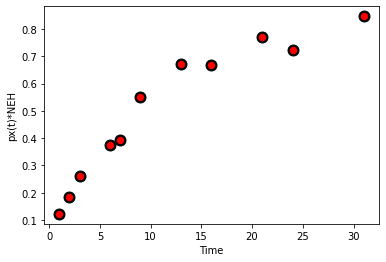

************** RMSE= 0.00047110709994234375 R square= 0.999996114529378
[0.1224, 0.1853, 0.26180000000000003, 0.374, 0.3944, 0.5508, 0.6732, 0.6681, 0.7701, 0.7242, 0.8465999999999999]

 estimated NEH 17


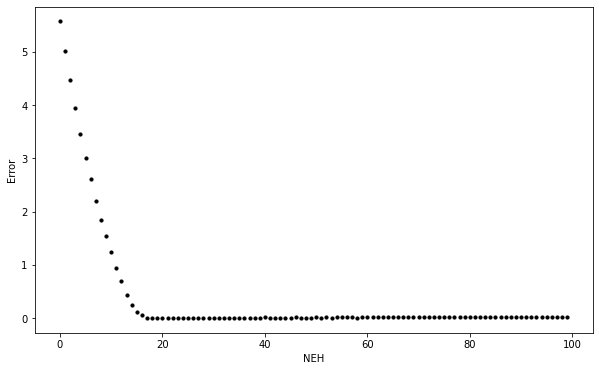


True NEH = 17 	 estimated NEHs median 17




 _DDGSWEVIEGYR_2 Time 1 ==================================>


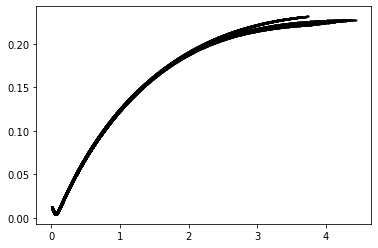

pxt*NEH = 0.063 real_NEH= 23 ratio = 0.0027391304347826086 

vals 0.058612209592482575

 _DDGSWEVIEGYR_2 Time 2 ==================================>


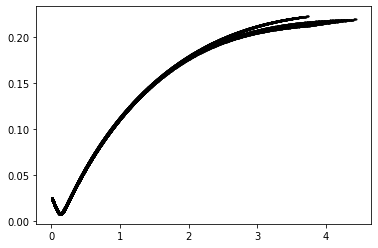

pxt*NEH = 0.13019999999999998 real_NEH= 23 ratio = 0.005660869565217391 

vals 0.10714873995757315

 _DDGSWEVIEGYR_2 Time 3 ==================================>


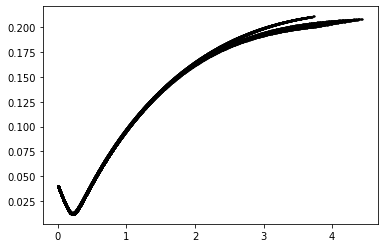

pxt*NEH = 0.217 real_NEH= 23 ratio = 0.009434782608695652 

vals 0.1560611952680823

 _DDGSWEVIEGYR_2 Time 6 ==================================>


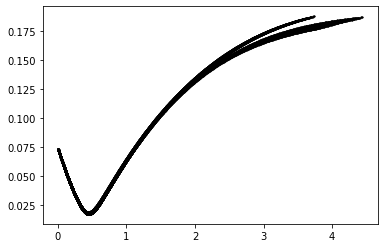

pxt*NEH = 0.453899911 real_NEH= 23 ratio = 0.019734778739130435 

vals 0.2992396195522442

 _DDGSWEVIEGYR_2 Time 7 ==================================>


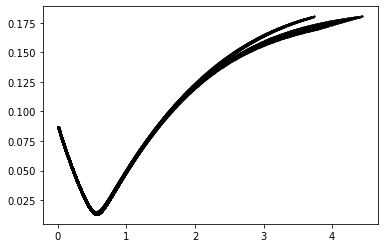

pxt*NEH = 0.5631997360000001 real_NEH= 23 ratio = 0.024486945043478262 

vals 0.4241954572341041

 _DDGSWEVIEGYR_2 Time 9 ==================================>


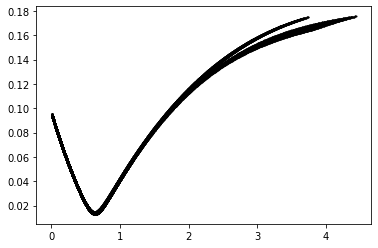

pxt*NEH = 0.631899555 real_NEH= 23 ratio = 0.02747389369565217 

vals 0.47816929666946395

 _DDGSWEVIEGYR_2 Time 13 ==================================>


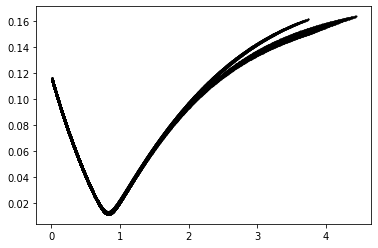

pxt*NEH = 0.827699288 real_NEH= 23 ratio = 0.03598692556521739 

vals 0.6460013955458421

 _DDGSWEVIEGYR_2 Time 16 ==================================>


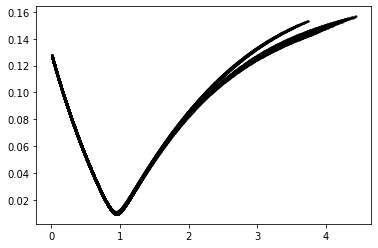

pxt*NEH = 0.94499925 real_NEH= 23 ratio = 0.04108692391304348 

vals 0.7776881944093131

 _DDGSWEVIEGYR_2 Time 21 ==================================>


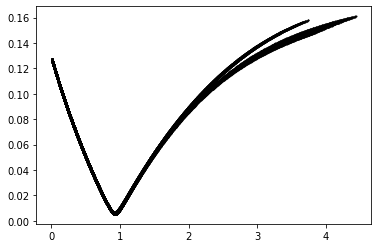

pxt*NEH = 0.92559911 real_NEH= 23 ratio = 0.040243439565217386 

vals 0.8309249189591167

 _DDGSWEVIEGYR_2 Time 24 ==================================>


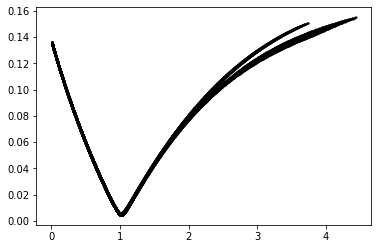

pxt*NEH = 1.0199985 real_NEH= 23 ratio = 0.04434776086956522 

vals 0.9405546232761096

 _DDGSWEVIEGYR_2 Time 31 ==================================>


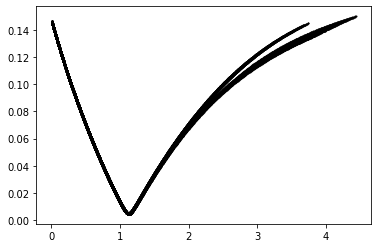

pxt*NEH = 1.1249985 real_NEH= 23 ratio = 0.048912978260869565 

vals 1.0453968532451252

 [0.063, 0.13019999999999998, 0.217, 0.453899911, 0.5631997360000001, 0.631899555, 0.827699288, 0.94499925, 0.92559911, 1.0199985, 1.1249985]


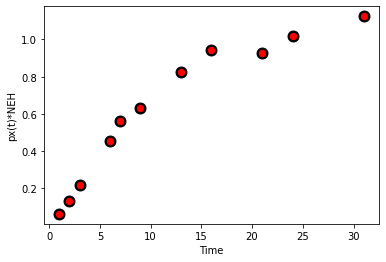

************** RMSE= 0.0005221471437671554 R square= 0.9999978579650797
[0.0625, 0.13, 0.21749999999999997, 0.455, 0.5625, 0.6325, 0.8274999999999999, 0.9450000000000001, 0.9249999999999999, 1.02, 1.125]

 estimated NEH 25


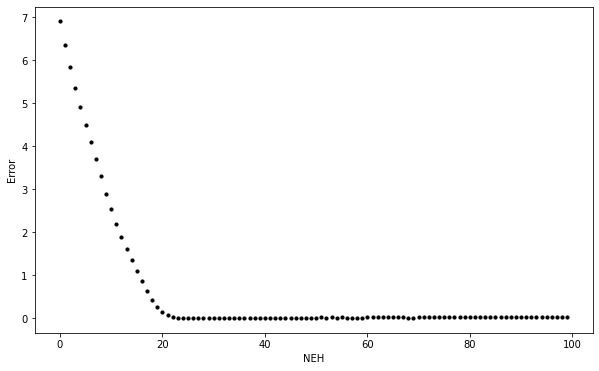


True NEH = 23 	 estimated NEHs median 25




 _DIVHSGLAYTMER_3 Time 1 ==================================>


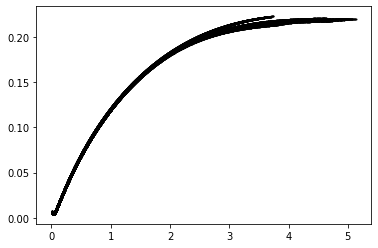

pxt*NEH = 0.033 real_NEH= 24 ratio = 0.0013750000000000001 

vals 0.045510536022068296

 _DIVHSGLAYTMER_3 Time 2 ==================================>


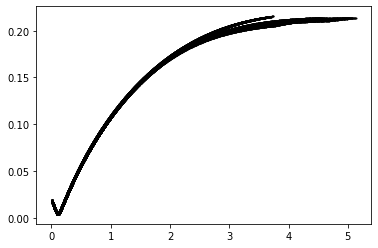

pxt*NEH = 0.108 real_NEH= 24 ratio = 0.0045 

vals 0.11550709513038848

 _DIVHSGLAYTMER_3 Time 3 ==================================>


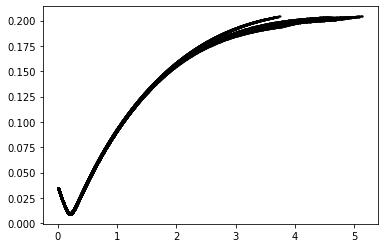

pxt*NEH = 0.20700000000000002 real_NEH= 24 ratio = 0.008625 

vals 0.16697228094321623

 _DIVHSGLAYTMER_3 Time 6 ==================================>


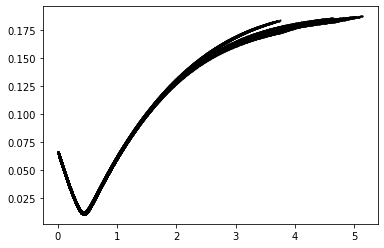

pxt*NEH = 0.4386 real_NEH= 24 ratio = 0.018275 

vals 0.3490900602895825

 _DIVHSGLAYTMER_3 Time 7 ==================================>


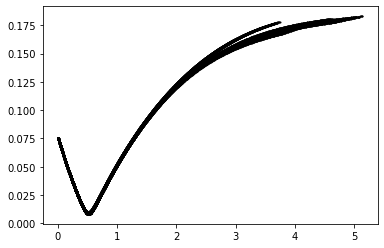

pxt*NEH = 0.5149998969999999 real_NEH= 24 ratio = 0.021458329041666665 

vals 0.44506263497053933

 _DIVHSGLAYTMER_3 Time 9 ==================================>


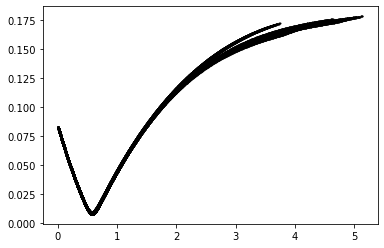

pxt*NEH = 0.576799794 real_NEH= 24 ratio = 0.02403332475 

vals 0.5367905163278852

 _DIVHSGLAYTMER_3 Time 13 ==================================>


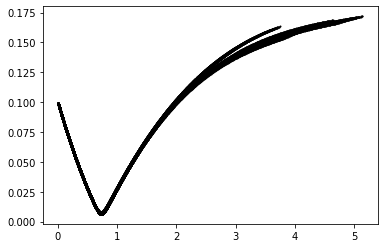

pxt*NEH = 0.731299485 real_NEH= 24 ratio = 0.030470811875 

vals 0.6504102372747455

 _DIVHSGLAYTMER_3 Time 16 ==================================>


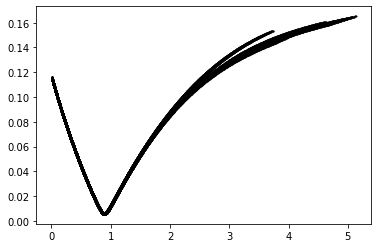

pxt*NEH = 0.89249925 real_NEH= 24 ratio = 0.03718746875 

vals 0.8159622928115041

 _DIVHSGLAYTMER_3 Time 21 ==================================>


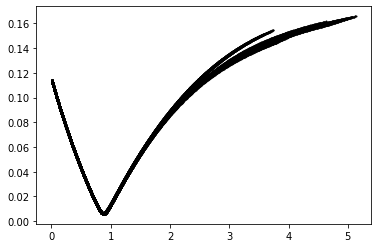

pxt*NEH = 0.8786992929999999 real_NEH= 24 ratio = 0.036612470541666664 

vals 0.7877019889241306

 _DIVHSGLAYTMER_3 Time 24 ==================================>


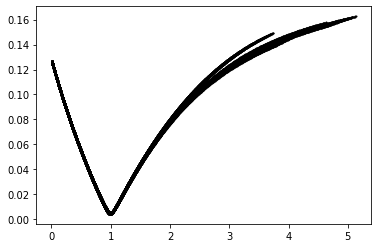

pxt*NEH = 0.9860051999999999 real_NEH= 24 ratio = 0.041083549999999996 

vals 1.01146856763594

 _DIVHSGLAYTMER_3 Time 31 ==================================>


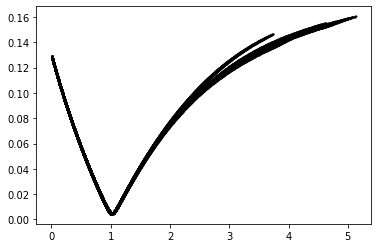

pxt*NEH = 1.01220504 real_NEH= 24 ratio = 0.04217521 

vals 1.0985975046895062

 [0.033, 0.108, 0.20700000000000002, 0.4386, 0.5149998969999999, 0.576799794, 0.731299485, 0.89249925, 0.8786992929999999, 0.9860051999999999, 1.01220504]


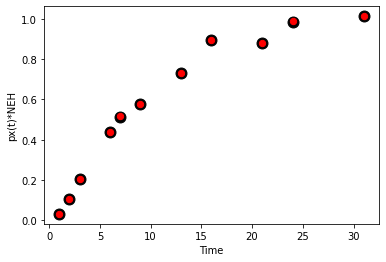

************** RMSE= 0.0004247832198170068 R square= 0.9999984079960856
[0.0322, 0.1081, 0.207, 0.43929999999999997, 0.5152, 0.5773, 0.7314, 0.8924000000000001, 0.8785999999999999, 0.9867, 1.012]

 estimated NEH 23


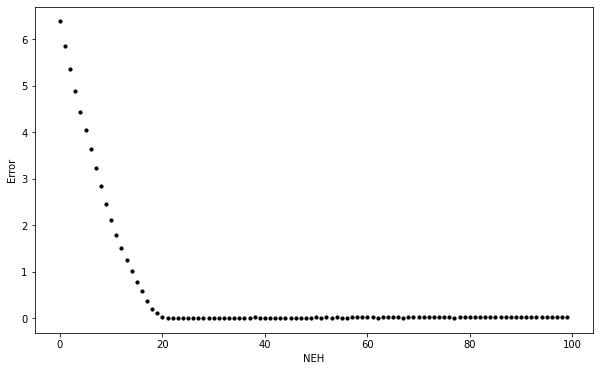


True NEH = 24 	 estimated NEHs median 23




 _DSNYHLLMSVQESLER_2 Time 1 ==================================>


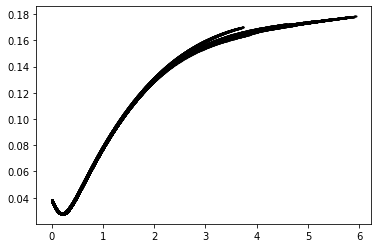

pxt*NEH = 0.21 real_NEH= 33 ratio = 0.006363636363636363 

vals 0.008944346902564945

 _DSNYHLLMSVQESLER_2 Time 2 ==================================>


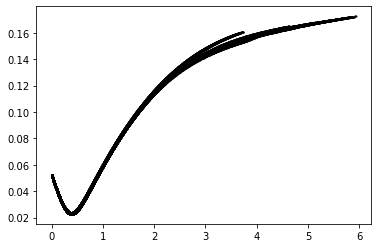

pxt*NEH = 0.3927 real_NEH= 33 ratio = 0.011899999999999999 

vals 0.1742919270889452

 _DSNYHLLMSVQESLER_2 Time 3 ==================================>


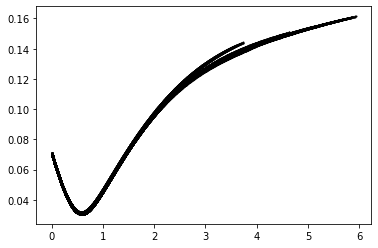

pxt*NEH = 0.591599884 real_NEH= 33 ratio = 0.017927269212121212 

vals 0.2023337396531277

 _DSNYHLLMSVQESLER_2 Time 6 ==================================>


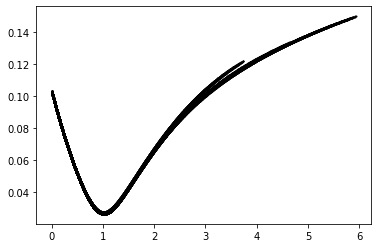

pxt*NEH = 1.0199985 real_NEH= 33 ratio = 0.030909045454545456 

vals 0.6009102485791096

 _DSNYHLLMSVQESLER_2 Time 7 ==================================>


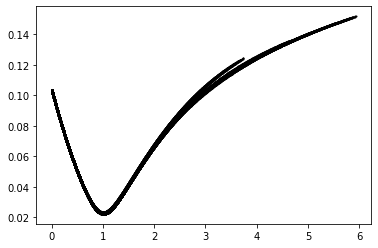

pxt*NEH = 1.0124985 real_NEH= 33 ratio = 0.030681772727272728 

vals 0.672117595259968

 _DSNYHLLMSVQESLER_2 Time 9 ==================================>


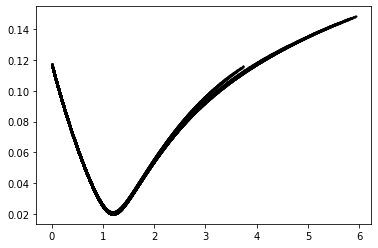

pxt*NEH = 1.1999985 real_NEH= 33 ratio = 0.03636359090909091 

vals 0.8168789379752078

 _DSNYHLLMSVQESLER_2 Time 13 ==================================>


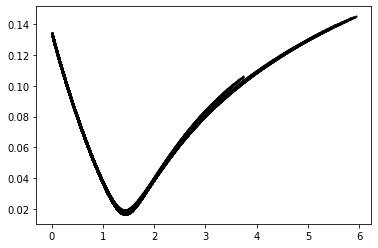

pxt*NEH = 1.4324985 real_NEH= 33 ratio = 0.04340904545454545 

vals 1.1235235288690948

 _DSNYHLLMSVQESLER_2 Time 16 ==================================>


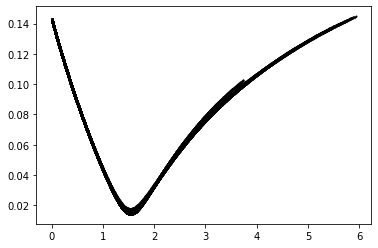

pxt*NEH = 1.5449977499999998 real_NEH= 33 ratio = 0.04681811363636363 

vals 1.2863876074118377

 _DSNYHLLMSVQESLER_2 Time 21 ==================================>


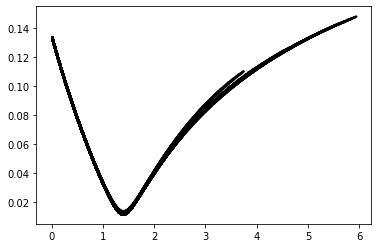

pxt*NEH = 1.3949984999999998 real_NEH= 33 ratio = 0.04227268181818181 

vals 1.2393705791516523

 _DSNYHLLMSVQESLER_2 Time 24 ==================================>


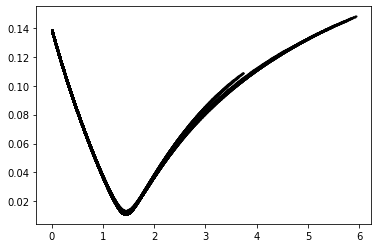

pxt*NEH = 1.44539781 real_NEH= 33 ratio = 0.043799933636363635 

vals 1.3884752397708882

 _DSNYHLLMSVQESLER_2 Time 31 ==================================>


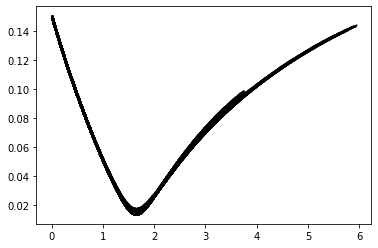

pxt*NEH = 1.64410451 real_NEH= 33 ratio = 0.04982134878787879 

vals 1.443093500719139

 [0.21, 0.3927, 0.591599884, 1.0199985, 1.0124985, 1.1999985, 1.4324985, 1.5449977499999998, 1.3949984999999998, 1.44539781, 1.64410451]


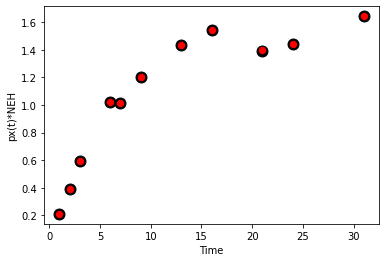

************** RMSE= 0.0007323527876990474 R square= 0.9999975229849116
[0.2112, 0.39270000000000005, 0.5907, 1.0197, 1.0131000000000001, 1.2012, 1.4322000000000001, 1.5444, 1.3959, 1.4454, 1.6434]

 estimated NEH 33


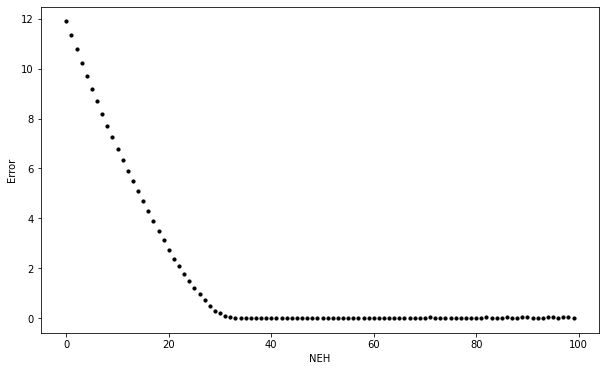


True NEH = 33 	 estimated NEHs median 33




 _DSNYHLLMSVQESLER_3 Time 1 ==================================>


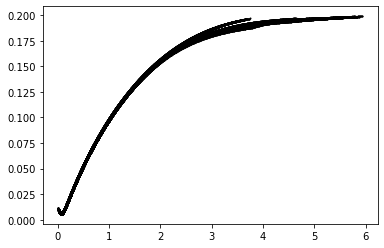

pxt*NEH = 0.0682 real_NEH= 33 ratio = 0.0020666666666666667 

vals 0.11001012849194122

 _DSNYHLLMSVQESLER_3 Time 2 ==================================>


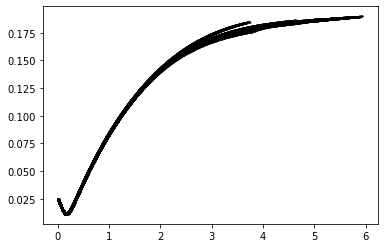

pxt*NEH = 0.165 real_NEH= 33 ratio = 0.005 

vals 0.15249786961613

 _DSNYHLLMSVQESLER_3 Time 3 ==================================>


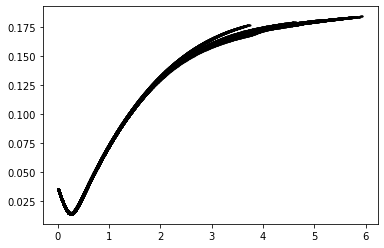

pxt*NEH = 0.255 real_NEH= 33 ratio = 0.007727272727272728 

vals 0.16768221146205808

 _DSNYHLLMSVQESLER_3 Time 6 ==================================>


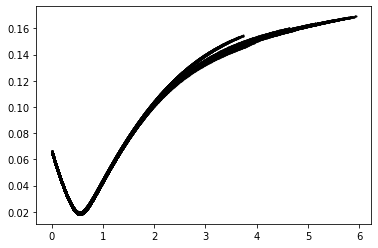

pxt*NEH = 0.554599882 real_NEH= 33 ratio = 0.01680605703030303 

vals 0.32394306913042564

 _DSNYHLLMSVQESLER_3 Time 7 ==================================>


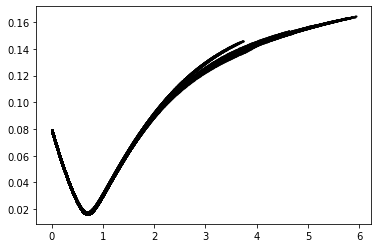

pxt*NEH = 0.7020996429999999 real_NEH= 33 ratio = 0.021275746757575757 

vals 0.4700351254861216

 _DSNYHLLMSVQESLER_3 Time 9 ==================================>


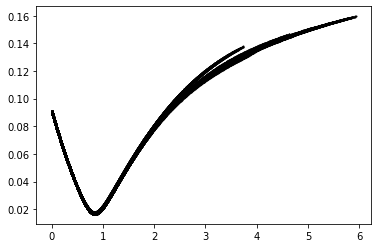

pxt*NEH = 0.84679942 real_NEH= 33 ratio = 0.025660588484848482 

vals 0.556479088856106

 _DSNYHLLMSVQESLER_3 Time 13 ==================================>


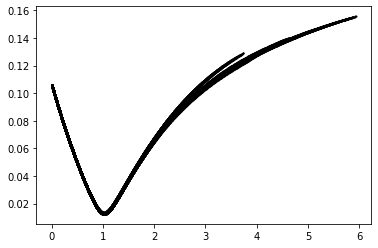

pxt*NEH = 1.0274985 real_NEH= 33 ratio = 0.031136318181818185 

vals 0.723641864347185

 _DSNYHLLMSVQESLER_3 Time 16 ==================================>


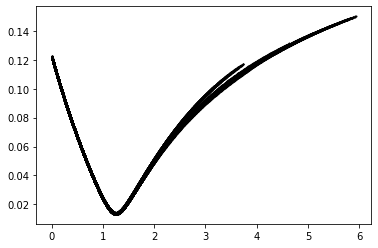

pxt*NEH = 1.2524985 real_NEH= 33 ratio = 0.0379545 

vals 0.8752648190812652

 _DSNYHLLMSVQESLER_3 Time 21 ==================================>


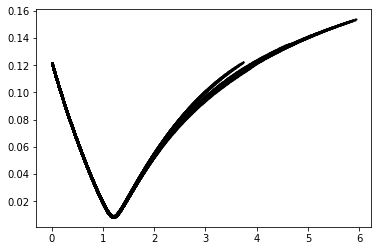

pxt*NEH = 1.2044985400000001 real_NEH= 33 ratio = 0.03649995575757576 

vals 0.9971092907258098

 _DSNYHLLMSVQESLER_3 Time 24 ==================================>


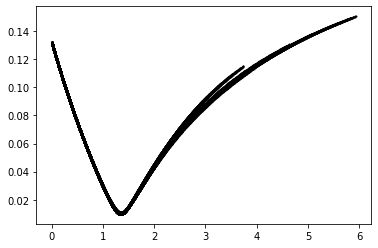

pxt*NEH = 1.34899858 real_NEH= 33 ratio = 0.040878744848484846 

vals 1.1962423644664204

 _DSNYHLLMSVQESLER_3 Time 31 ==================================>


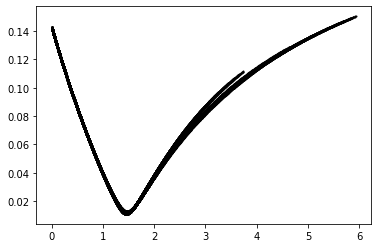

pxt*NEH = 1.44710783 real_NEH= 33 ratio = 0.04385175242424243 

vals 1.3328793577014746

 [0.0682, 0.165, 0.255, 0.554599882, 0.7020996429999999, 0.84679942, 1.0274985, 1.2524985, 1.2044985400000001, 1.34899858, 1.44710783]


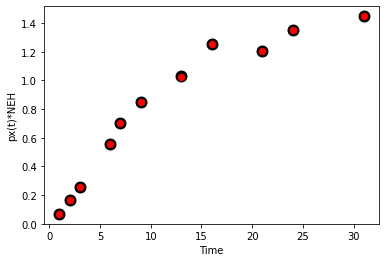

************** RMSE= 0.0006615100517805324 R square= 0.9999980333422477
[0.0696, 0.1653, 0.25520000000000004, 0.5539, 0.7018, 0.8468, 1.0266, 1.2528000000000001, 1.2035, 1.3485, 1.4471]

 estimated NEH 29


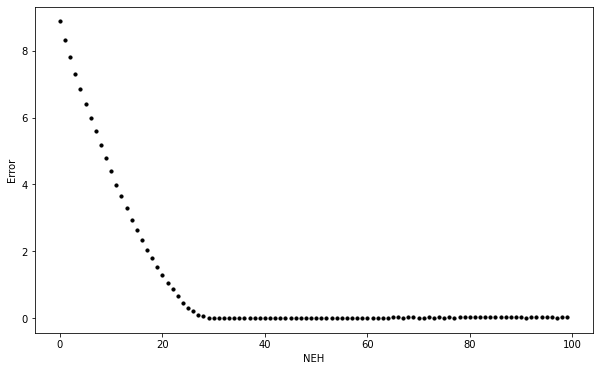


True NEH = 33 	 estimated NEHs median 29




 _GFIGPGIDVPAPDMSTGER_2 Time 1 ==================================>


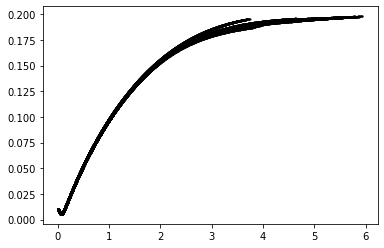

pxt*NEH = 0.066 real_NEH= 37 ratio = 0.001783783783783784 

vals 0.05615708149038952

 _GFIGPGIDVPAPDMSTGER_2 Time 2 ==================================>


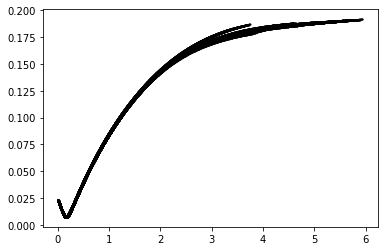

pxt*NEH = 0.162 real_NEH= 37 ratio = 0.004378378378378379 

vals 0.13111586314236046

 _GFIGPGIDVPAPDMSTGER_2 Time 3 ==================================>


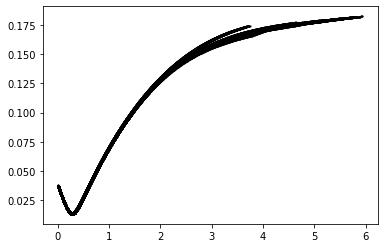

pxt*NEH = 0.276 real_NEH= 37 ratio = 0.00745945945945946 

vals 0.1759312216865373

 _GFIGPGIDVPAPDMSTGER_2 Time 6 ==================================>


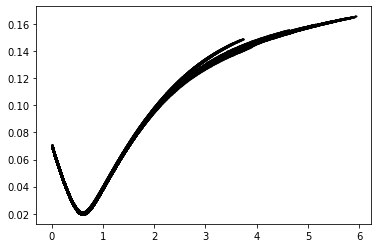

pxt*NEH = 0.606899881 real_NEH= 37 ratio = 0.016402699486486486 

vals 0.31096198594915675

 _GFIGPGIDVPAPDMSTGER_2 Time 7 ==================================>


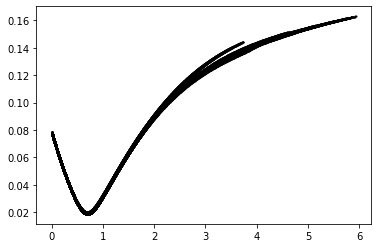

pxt*NEH = 0.7020996429999999 real_NEH= 37 ratio = 0.018975666027027025 

vals 0.3701549880305858

 _GFIGPGIDVPAPDMSTGER_2 Time 9 ==================================>


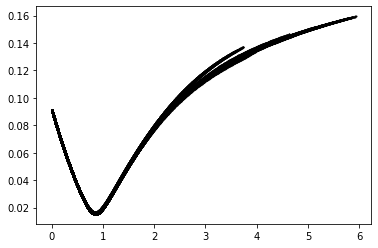

pxt*NEH = 0.85839942 real_NEH= 37 ratio = 0.023199984324324324 

vals 0.5259523622716158

 _GFIGPGIDVPAPDMSTGER_2 Time 13 ==================================>


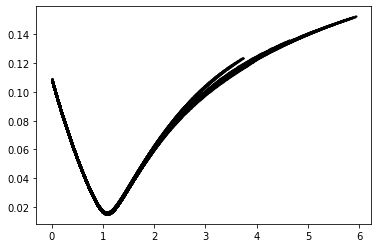

pxt*NEH = 1.0799985 real_NEH= 37 ratio = 0.02918914864864865 

vals 0.7312586189685097

 _GFIGPGIDVPAPDMSTGER_2 Time 16 ==================================>


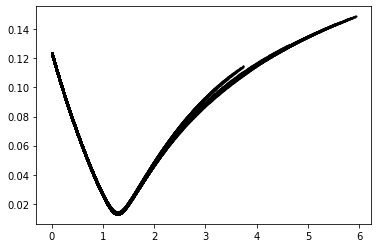

pxt*NEH = 1.2899985 real_NEH= 37 ratio = 0.03486482432432433 

vals 0.8555030168414343

 _GFIGPGIDVPAPDMSTGER_2 Time 21 ==================================>


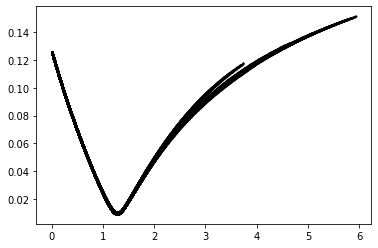

pxt*NEH = 1.2749985000000001 real_NEH= 37 ratio = 0.034459418918918926 

vals 1.0467276841211055

 _GFIGPGIDVPAPDMSTGER_2 Time 24 ==================================>


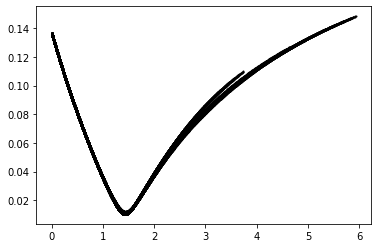

pxt*NEH = 1.4318995700000001 real_NEH= 37 ratio = 0.03869998837837838 

vals 1.1768101945244294

 _GFIGPGIDVPAPDMSTGER_2 Time 31 ==================================>


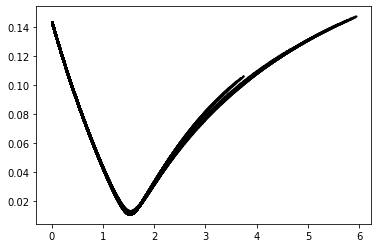

pxt*NEH = 1.51900806 real_NEH= 37 ratio = 0.04105427189189189 

vals 1.3075564574890872

 [0.066, 0.162, 0.276, 0.606899881, 0.7020996429999999, 0.85839942, 1.0799985, 1.2899985, 1.2749985000000001, 1.4318995700000001, 1.51900806]


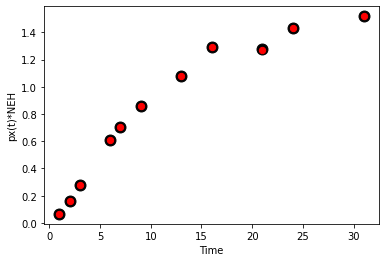

************** RMSE= 0.0007299582165196746 R square= 0.9999978381402621
[0.066, 0.16169999999999998, 0.2772, 0.6072, 0.7029, 0.858, 1.0791, 1.2903, 1.2738, 1.4322000000000001, 1.518]

 estimated NEH 33


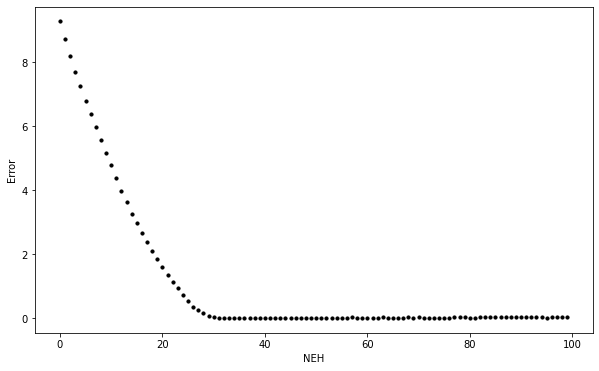


True NEH = 37 	 estimated NEHs median 33




 _GVFHGIENFINEASYM_2 Time 1 ==================================>


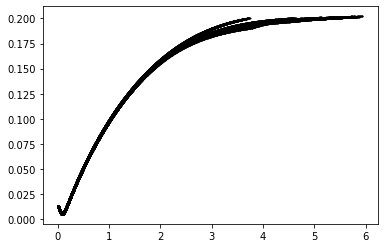

pxt*NEH = 0.08400028 real_NEH= 30 ratio = 0.002800009333333333 

vals 0.0492969481228782

 _GVFHGIENFINEASYM_2 Time 2 ==================================>


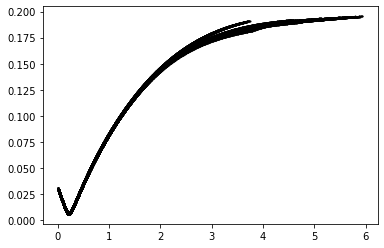

pxt*NEH = 0.2105007 real_NEH= 30 ratio = 0.007016690000000001 

vals 0.23170680552966508

 _GVFHGIENFINEASYM_2 Time 3 ==================================>


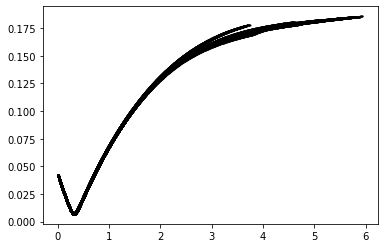

pxt*NEH = 0.3131 real_NEH= 30 ratio = 0.010436666666666667 

vals 0.25427084589844307

 _GVFHGIENFINEASYM_2 Time 6 ==================================>


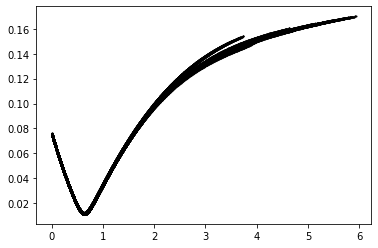

pxt*NEH = 0.6425997619999999 real_NEH= 30 ratio = 0.021419992066666664 

vals 0.5211968657320991

 _GVFHGIENFINEASYM_2 Time 7 ==================================>


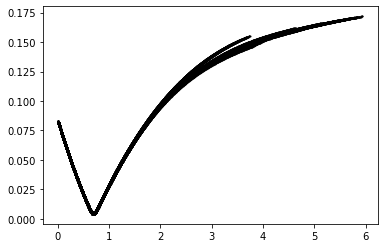

pxt*NEH = 0.69299937 real_NEH= 30 ratio = 0.023099979 

vals 0.6645790484501636

 _GVFHGIENFINEASYM_2 Time 9 ==================================>


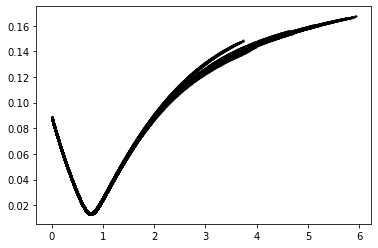

pxt*NEH = 0.766999528 real_NEH= 30 ratio = 0.025566650933333334 

vals 0.7624774818212292

 _GVFHGIENFINEASYM_2 Time 13 ==================================>


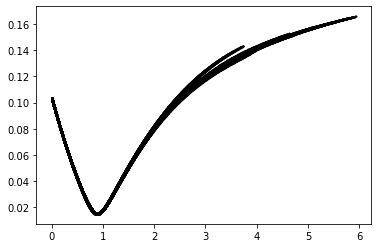

pxt*NEH = 0.88560468 real_NEH= 30 ratio = 0.029520156000000002 

vals 1.3613043421322677

 _GVFHGIENFINEASYM_2 Time 16 ==================================>


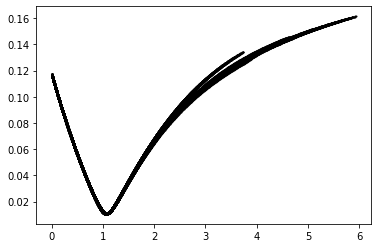

pxt*NEH = 1.06260528 real_NEH= 30 ratio = 0.035420176000000005 

vals 1.4018406634358287

 _GVFHGIENFINEASYM_2 Time 21 ==================================>


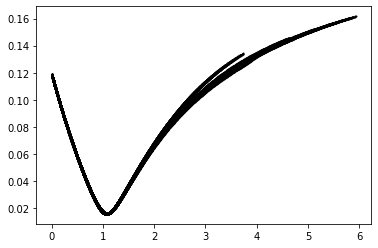

pxt*NEH = 1.0714055 real_NEH= 30 ratio = 0.03571351666666667 

vals 1.6710992618175362

 _GVFHGIENFINEASYM_2 Time 24 ==================================>


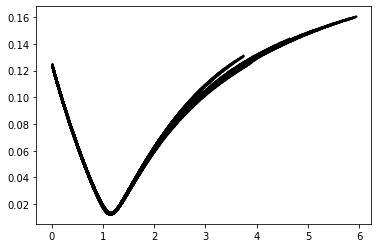

pxt*NEH = 1.14080621 real_NEH= 30 ratio = 0.03802687366666667 

vals 1.6644540257478566

 _GVFHGIENFINEASYM_2 Time 31 ==================================>


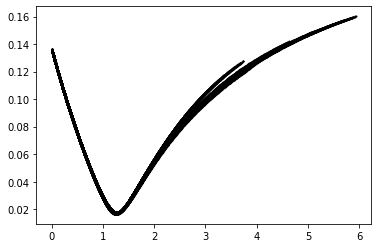

pxt*NEH = 1.2475067499999999 real_NEH= 30 ratio = 0.04158355833333333 

vals 2.1606032171335934

 [0.08400028, 0.2105007, 0.3131, 0.6425997619999999, 0.69299937, 0.766999528, 0.88560468, 1.06260528, 1.0714055, 1.14080621, 1.2475067499999999]


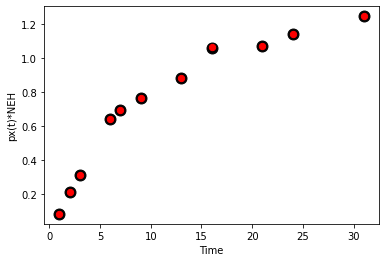

************** RMSE= 0.0006265468568508903 R square= 0.9999972295325321
[0.0837, 0.21059999999999998, 0.3132, 0.6426000000000001, 0.6939, 0.7668, 0.8856, 1.0637999999999999, 1.0719, 1.1421, 1.2473999999999998]

 estimated NEH 27


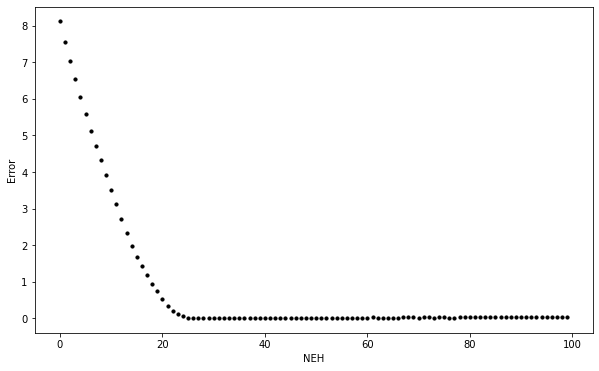


True NEH = 30 	 estimated NEHs median 27




 _HGGTIPVVPTAEFQDR_2 Time 1 ==================================>


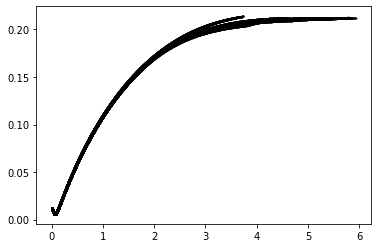

pxt*NEH = 0.06720000000000001 real_NEH= 32 ratio = 0.0021000000000000003 

vals 0.03806018829254871

 _HGGTIPVVPTAEFQDR_2 Time 2 ==================================>


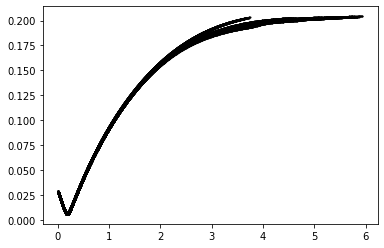

pxt*NEH = 0.18 real_NEH= 32 ratio = 0.005625 

vals 0.1371357762884826

 _HGGTIPVVPTAEFQDR_2 Time 3 ==================================>


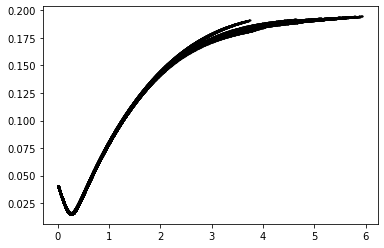

pxt*NEH = 0.258 real_NEH= 32 ratio = 0.0080625 

vals 0.11804298948646584

 _HGGTIPVVPTAEFQDR_2 Time 6 ==================================>


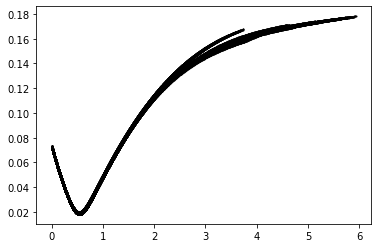

pxt*NEH = 0.5428 real_NEH= 32 ratio = 0.0169625 

vals 0.2802790158881048

 _HGGTIPVVPTAEFQDR_2 Time 7 ==================================>


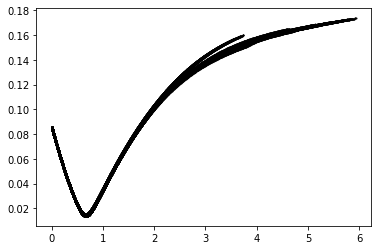

pxt*NEH = 0.6663997620000001 real_NEH= 32 ratio = 0.020824992562500002 

vals 0.45590856517712963

 _HGGTIPVVPTAEFQDR_2 Time 9 ==================================>


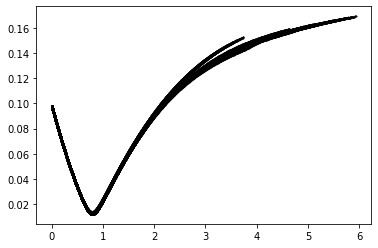

pxt*NEH = 0.7972995239999999 real_NEH= 32 ratio = 0.024915610124999998 

vals 0.5710186642362879

 _HGGTIPVVPTAEFQDR_2 Time 13 ==================================>


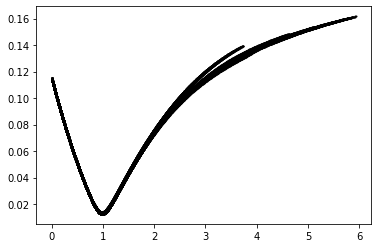

pxt*NEH = 0.98999925 real_NEH= 32 ratio = 0.0309374765625 

vals 0.7100756301987541

 _HGGTIPVVPTAEFQDR_2 Time 16 ==================================>


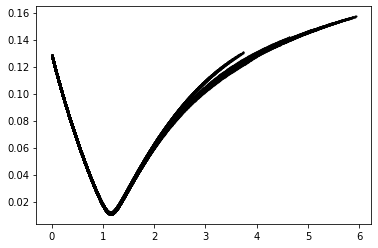

pxt*NEH = 1.1549985 real_NEH= 32 ratio = 0.036093703125 

vals 0.835315155726617

 _HGGTIPVVPTAEFQDR_2 Time 21 ==================================>


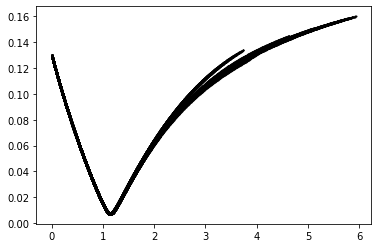

pxt*NEH = 1.1474985 real_NEH= 32 ratio = 0.035859328125 

vals 0.9336460975560931

 _HGGTIPVVPTAEFQDR_2 Time 24 ==================================>


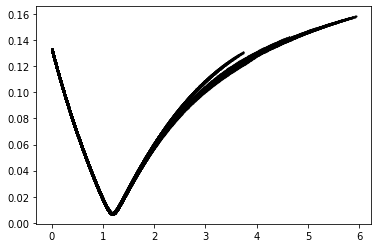

pxt*NEH = 1.1849985 real_NEH= 32 ratio = 0.037031203125 

vals 1.0123705301194312

 _HGGTIPVVPTAEFQDR_2 Time 31 ==================================>


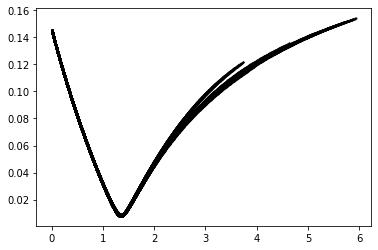

pxt*NEH = 1.3499984999999999 real_NEH= 32 ratio = 0.042187453124999996 

vals 1.1784970857149344

 [0.06720000000000001, 0.18, 0.258, 0.5428, 0.6663997620000001, 0.7972995239999999, 0.98999925, 1.1549985, 1.1474985, 1.1849985, 1.3499984999999999]


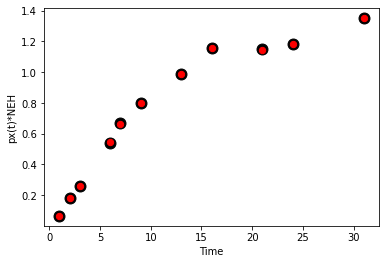

************** RMSE= 0.0006307272747118842 R square= 0.9999978266393282
[0.066, 0.18, 0.258, 0.543, 0.666, 0.7979999999999999, 0.99, 1.155, 1.146, 1.185, 1.3499999999999999]

 estimated NEH 30


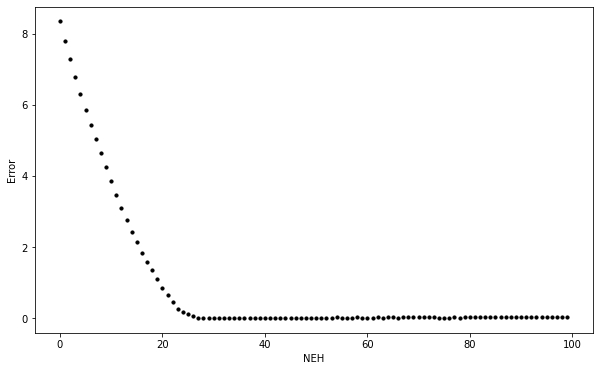


True NEH = 32 	 estimated NEHs median 30




 _HGGTIPVVPTAEFQDR_3 Time 1 ==================================>


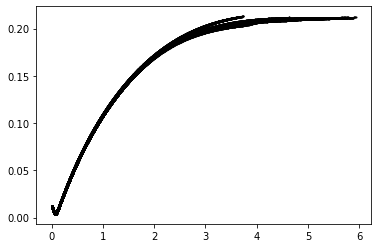

pxt*NEH = 0.075 real_NEH= 32 ratio = 0.00234375 

vals 0.06956333331430586

 _HGGTIPVVPTAEFQDR_3 Time 2 ==================================>


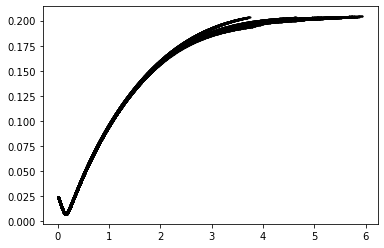

pxt*NEH = 0.1519 real_NEH= 32 ratio = 0.004746875 

vals 0.10478304150170746

 _HGGTIPVVPTAEFQDR_3 Time 3 ==================================>


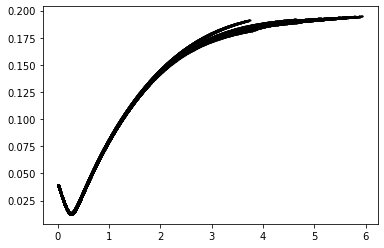

pxt*NEH = 0.255 real_NEH= 32 ratio = 0.00796875 

vals 0.16356244426594752

 _HGGTIPVVPTAEFQDR_3 Time 6 ==================================>


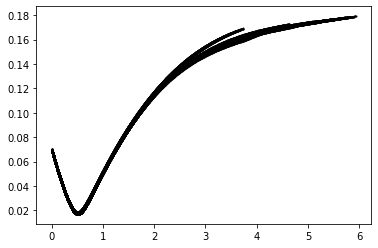

pxt*NEH = 0.5117 real_NEH= 32 ratio = 0.015990625 

vals 0.3046478969428745

 _HGGTIPVVPTAEFQDR_3 Time 7 ==================================>


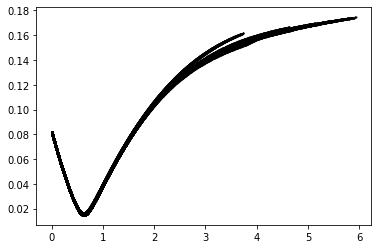

pxt*NEH = 0.630699762 real_NEH= 32 ratio = 0.0197093675625 

vals 0.43367234210959543

 _HGGTIPVVPTAEFQDR_3 Time 9 ==================================>


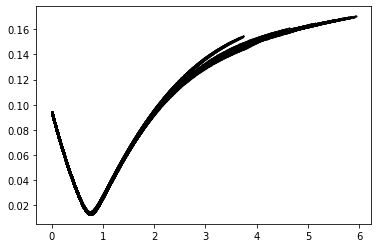

pxt*NEH = 0.753999536 real_NEH= 32 ratio = 0.0235624855 

vals 0.5187784116877946

 _HGGTIPVVPTAEFQDR_3 Time 13 ==================================>


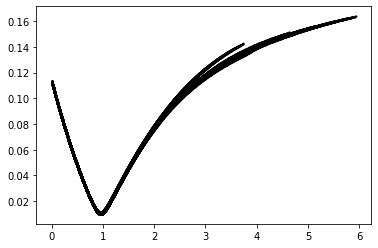

pxt*NEH = 0.9599992500000001 real_NEH= 32 ratio = 0.029999976562500003 

vals 0.7489868611736181

 _HGGTIPVVPTAEFQDR_3 Time 16 ==================================>


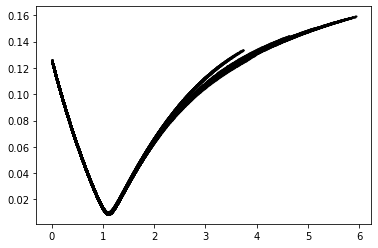

pxt*NEH = 1.1099985 real_NEH= 32 ratio = 0.034687453125 

vals 0.9134754261187805

 _HGGTIPVVPTAEFQDR_3 Time 21 ==================================>


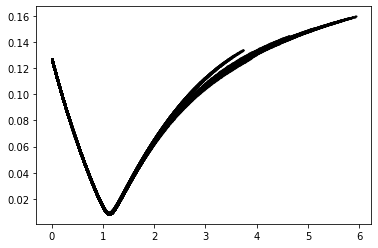

pxt*NEH = 1.1249985 real_NEH= 32 ratio = 0.035156203125 

vals 0.8616297857533404

 _HGGTIPVVPTAEFQDR_3 Time 24 ==================================>


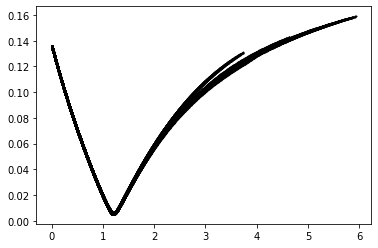

pxt*NEH = 1.2074985 real_NEH= 32 ratio = 0.037734328125 

vals 1.0972882171886256

 _HGGTIPVVPTAEFQDR_3 Time 31 ==================================>


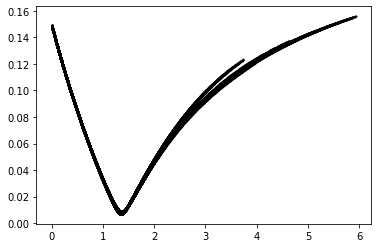

pxt*NEH = 1.3473072899999998 real_NEH= 32 ratio = 0.042103352812499995 

vals 1.2692302039144994

 [0.075, 0.1519, 0.255, 0.5117, 0.630699762, 0.753999536, 0.9599992500000001, 1.1099985, 1.1249985, 1.2074985, 1.3473072899999998]


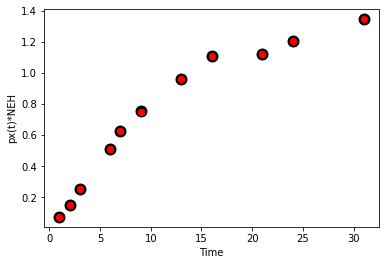

************** RMSE= 0.0007821109854129694 R square= 0.9999966498370303
[0.075, 0.15300000000000002, 0.255, 0.513, 0.63, 0.753, 0.96, 1.1099999999999999, 1.125, 1.206, 1.347]

 estimated NEH 30


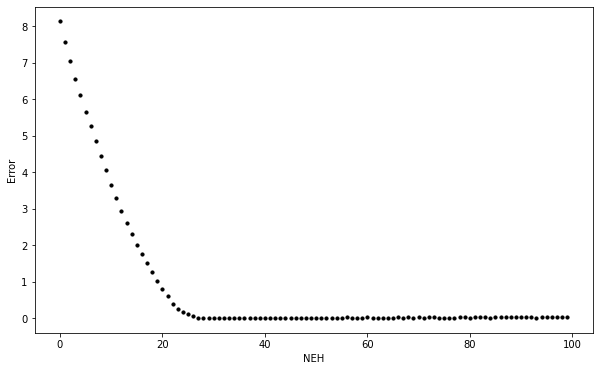


True NEH = 32 	 estimated NEHs median 30




 _LQHGSILGFPK_3 Time 1 ==================================>


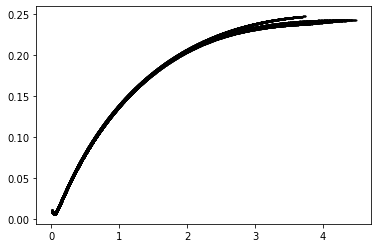

pxt*NEH = 0.042 real_NEH= 19 ratio = 0.002210526315789474 

vals 0.015407799127407284

 _LQHGSILGFPK_3 Time 2 ==================================>


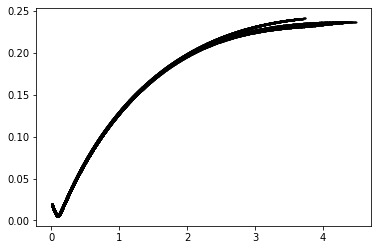

pxt*NEH = 0.09 real_NEH= 19 ratio = 0.004736842105263157 

vals 0.06431338575001744

 _LQHGSILGFPK_3 Time 3 ==================================>


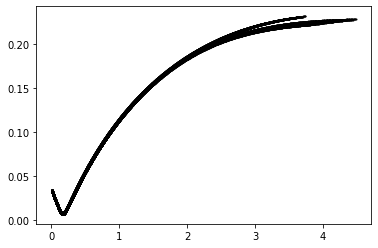

pxt*NEH = 0.168 real_NEH= 19 ratio = 0.008842105263157896 

vals 0.12573347490275275

 _LQHGSILGFPK_3 Time 6 ==================================>


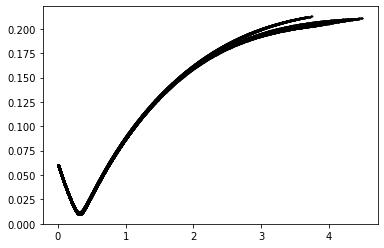

pxt*NEH = 0.3204 real_NEH= 19 ratio = 0.016863157894736844 

vals 0.24738241709990172

 _LQHGSILGFPK_3 Time 7 ==================================>


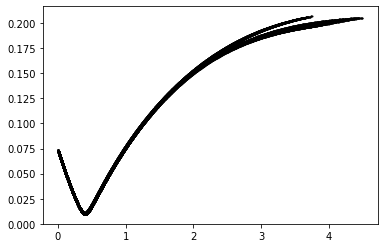

pxt*NEH = 0.40049999999999997 real_NEH= 19 ratio = 0.02107894736842105 

vals 0.32118762316966515

 _LQHGSILGFPK_3 Time 9 ==================================>


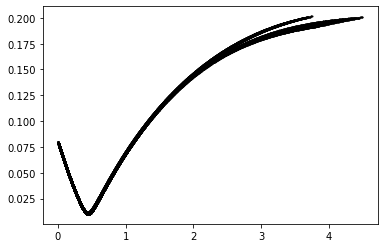

pxt*NEH = 0.44499991099999997 real_NEH= 19 ratio = 0.02342104794736842 

vals 0.3556293954174218

 _LQHGSILGFPK_3 Time 13 ==================================>


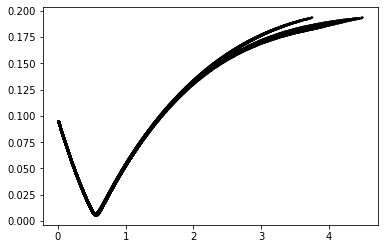

pxt*NEH = 0.5579997299999999 real_NEH= 19 ratio = 0.02936840684210526 

vals 0.5009490033199986

 _LQHGSILGFPK_3 Time 16 ==================================>


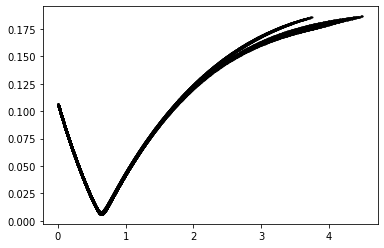

pxt*NEH = 0.640799555 real_NEH= 19 ratio = 0.03372629236842105 

vals 0.5738928905437766

 _LQHGSILGFPK_3 Time 21 ==================================>


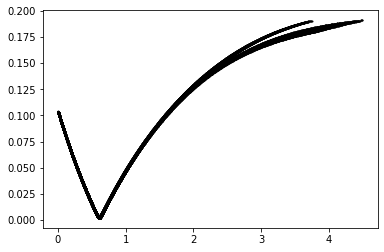

pxt*NEH = 0.610599503 real_NEH= 19 ratio = 0.03213681594736842 

vals 0.6073425338868964

 _LQHGSILGFPK_3 Time 24 ==================================>


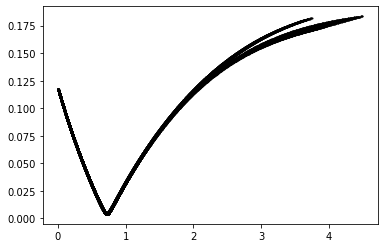

pxt*NEH = 0.722699343 real_NEH= 19 ratio = 0.038036807526315795 

vals 0.6975658050612124

 _LQHGSILGFPK_3 Time 31 ==================================>


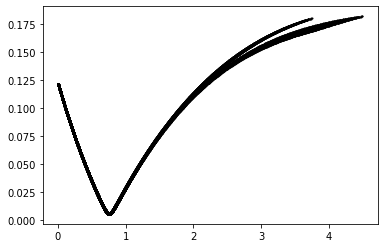

pxt*NEH = 0.75399884 real_NEH= 19 ratio = 0.039684149473684205 

vals 0.7207479094128822

 [0.042, 0.09, 0.168, 0.3204, 0.40049999999999997, 0.44499991099999997, 0.5579997299999999, 0.640799555, 0.610599503, 0.722699343, 0.75399884]


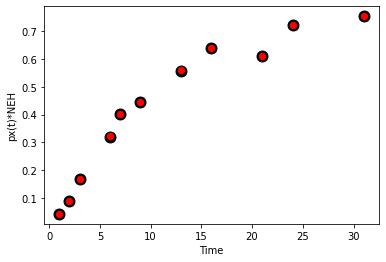

************** RMSE= 0.00043692788078749723 R square= 0.9999966769336658
[0.042, 0.0903, 0.168, 0.3213, 0.40109999999999996, 0.4452, 0.5586, 0.6405, 0.6111, 0.7224, 0.7539]

 estimated NEH 21


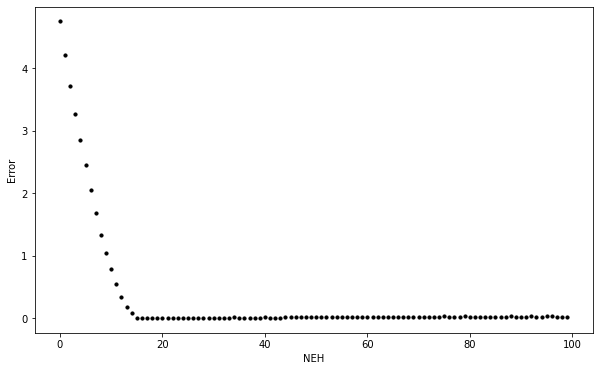


True NEH = 19 	 estimated NEHs median 21




 _NHVLSLSFPIR_3 Time 1 ==================================>


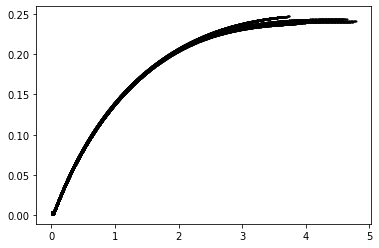

pxt*NEH = 0.021 real_NEH= 19 ratio = 0.001105263157894737 

vals 0.002919511701103061

 _NHVLSLSFPIR_3 Time 2 ==================================>


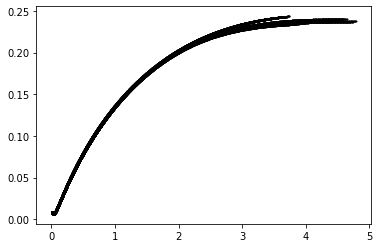

pxt*NEH = 0.031 real_NEH= 19 ratio = 0.001631578947368421 

vals -0.014295092084210027

 _NHVLSLSFPIR_3 Time 3 ==================================>


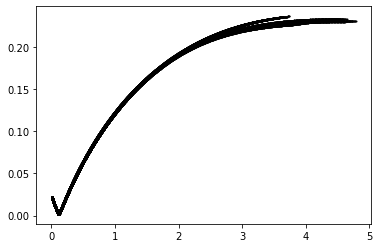

pxt*NEH = 0.11159999999999999 real_NEH= 19 ratio = 0.005873684210526316 

vals 0.08820201406312737

 _NHVLSLSFPIR_3 Time 6 ==================================>


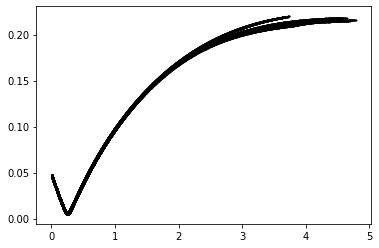

pxt*NEH = 0.252 real_NEH= 19 ratio = 0.013263157894736843 

vals 0.20043697163559904

 _NHVLSLSFPIR_3 Time 7 ==================================>


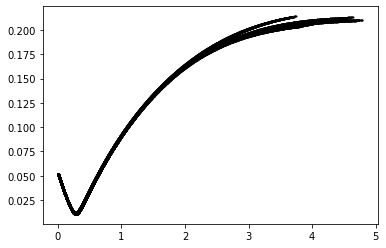

pxt*NEH = 0.279 real_NEH= 19 ratio = 0.014684210526315791 

vals 0.18349044216325025

 _NHVLSLSFPIR_3 Time 9 ==================================>


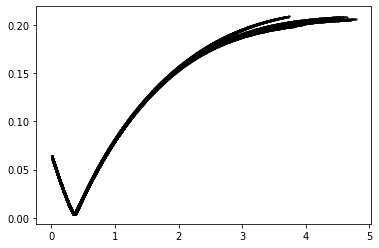

pxt*NEH = 0.3552 real_NEH= 19 ratio = 0.018694736842105264 

vals 0.31652841974793733

 _NHVLSLSFPIR_3 Time 13 ==================================>


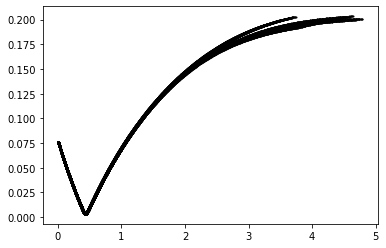

pxt*NEH = 0.43499991299999996 real_NEH= 19 ratio = 0.022894732263157892 

vals 0.43896250035960815

 _NHVLSLSFPIR_3 Time 16 ==================================>


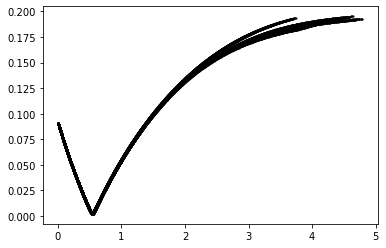

pxt*NEH = 0.54149981 real_NEH= 19 ratio = 0.028499990000000003 

vals 0.5217307473709765

 _NHVLSLSFPIR_3 Time 21 ==================================>


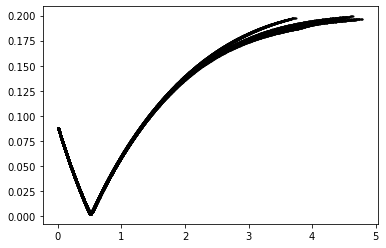

pxt*NEH = 0.5082023099999999 real_NEH= 19 ratio = 0.026747489999999995 

vals 0.515825015079709

 _NHVLSLSFPIR_3 Time 24 ==================================>


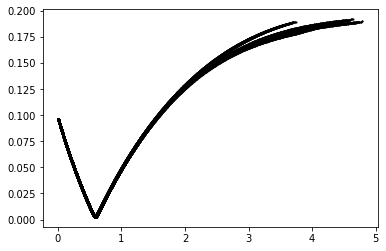

pxt*NEH = 0.5889997149999999 real_NEH= 19 ratio = 0.030999984999999997 

vals 0.5447047921928647

 _NHVLSLSFPIR_3 Time 31 ==================================>


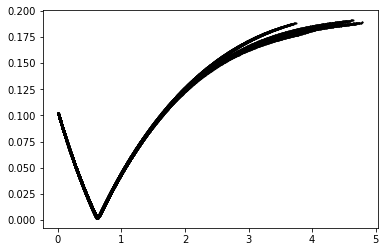

pxt*NEH = 0.61490299 real_NEH= 19 ratio = 0.032363315263157895 

vals 0.6524555913825218

 [0.021, 0.031, 0.11159999999999999, 0.252, 0.279, 0.3552, 0.43499991299999996, 0.54149981, 0.5082023099999999, 0.5889997149999999, 0.61490299]


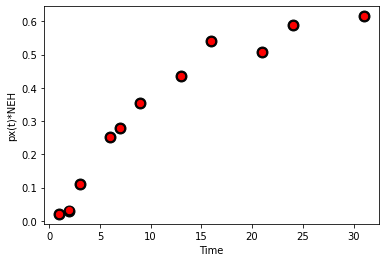

************** RMSE= 0.0003087092484838458 R square= 0.9999978004110799
[0.021, 0.0315, 0.111, 0.252, 0.27899999999999997, 0.3555, 0.435, 0.5415, 0.5085, 0.5895, 0.615]

 estimated NEH 15


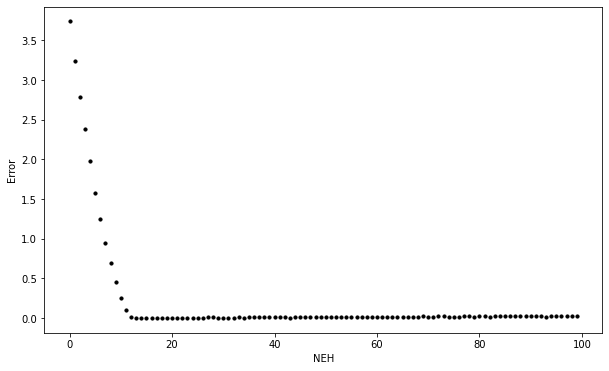


True NEH = 19 	 estimated NEHs median 15




 _RDDGSWEVIEGYR_3 Time 1 ==================================>


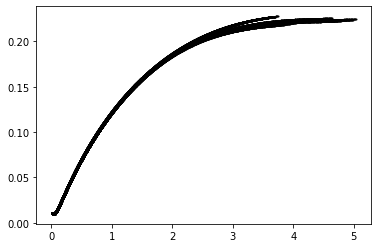

pxt*NEH = 0.0341 real_NEH= 27 ratio = 0.001262962962962963 

vals -0.011513820167688529

 _RDDGSWEVIEGYR_3 Time 2 ==================================>


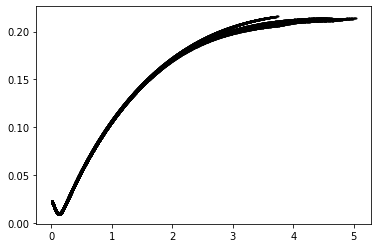

pxt*NEH = 0.126 real_NEH= 27 ratio = 0.004666666666666667 

vals 0.06921786206983811

 _RDDGSWEVIEGYR_3 Time 3 ==================================>


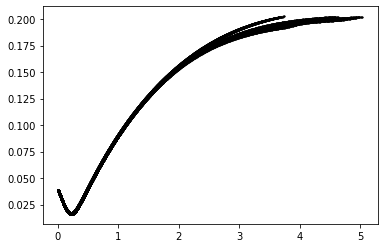

pxt*NEH = 0.222 real_NEH= 27 ratio = 0.008222222222222223 

vals 0.1065530027458403

 _RDDGSWEVIEGYR_3 Time 6 ==================================>


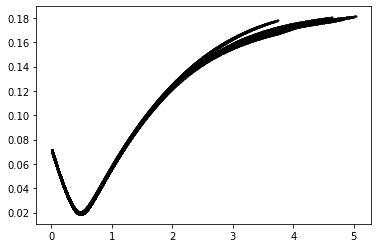

pxt*NEH = 0.47999990000000003 real_NEH= 27 ratio = 0.017777774074074076 

vals 0.289692831026829

 _RDDGSWEVIEGYR_3 Time 7 ==================================>


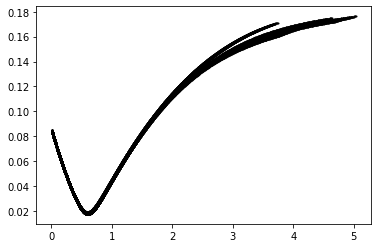

pxt*NEH = 0.5999997 real_NEH= 27 ratio = 0.022222211111111112 

vals 0.3490612468802718

 _RDDGSWEVIEGYR_3 Time 9 ==================================>


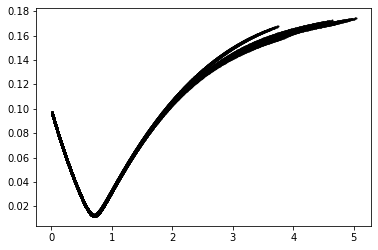

pxt*NEH = 0.706999596 real_NEH= 27 ratio = 0.02618517022222222 

vals 0.4912509476019004

 _RDDGSWEVIEGYR_3 Time 13 ==================================>


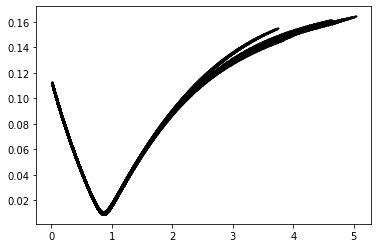

pxt*NEH = 0.864899256 real_NEH= 27 ratio = 0.03203330577777778 

vals 0.690891275954023

 _RDDGSWEVIEGYR_3 Time 16 ==================================>


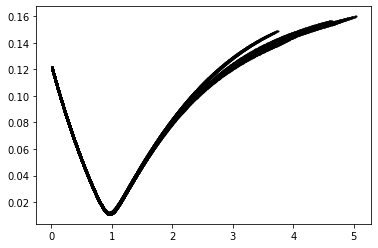

pxt*NEH = 0.9599992500000001 real_NEH= 27 ratio = 0.03555552777777778 

vals 0.6987760740766882

 _RDDGSWEVIEGYR_3 Time 21 ==================================>


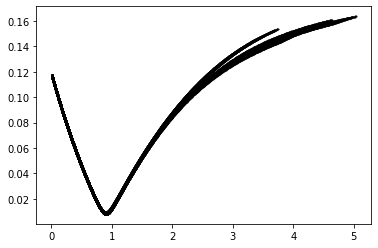

pxt*NEH = 0.902099163 real_NEH= 27 ratio = 0.03341108011111111 

vals 0.8566005224451892

 _RDDGSWEVIEGYR_3 Time 24 ==================================>


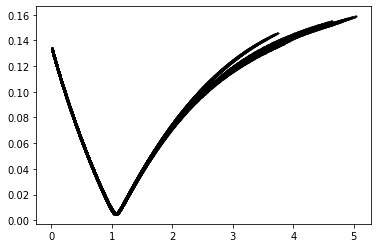

pxt*NEH = 1.05840408 real_NEH= 27 ratio = 0.039200151111111116 

vals 1.0018178366360702

 _RDDGSWEVIEGYR_3 Time 31 ==================================>


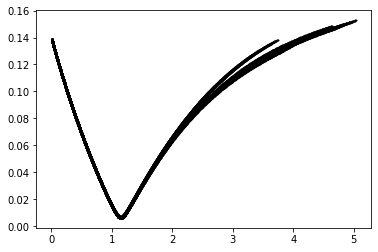

pxt*NEH = 1.1474985 real_NEH= 27 ratio = 0.042499944444444444 

vals 1.0273777063533207

 [0.0341, 0.126, 0.222, 0.47999990000000003, 0.5999997, 0.706999596, 0.864899256, 0.9599992500000001, 0.902099163, 1.05840408, 1.1474985]


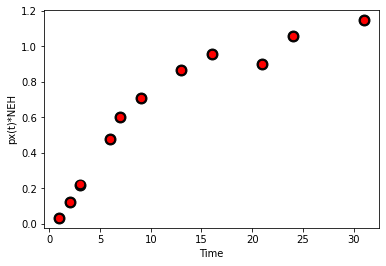

************** RMSE= 0.0005476053137584481 R square= 0.999997788655863
[0.034999999999999996, 0.125, 0.2225, 0.48, 0.6, 0.7075, 0.865, 0.96, 0.9025, 1.0574999999999999, 1.1475000000000002]

 estimated NEH 25


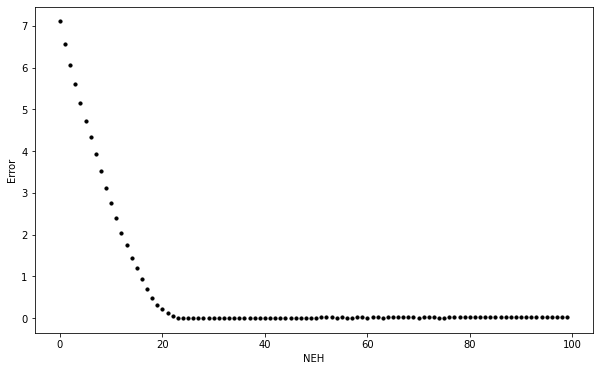


True NEH = 27 	 estimated NEHs median 25




 _TFVVQGFGNVGLHSMR_3 Time 1 ==================================>


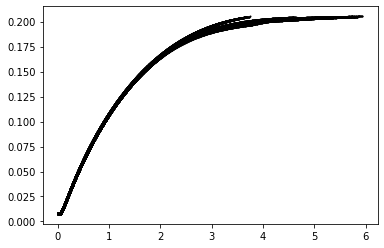

pxt*NEH = 0.027 real_NEH= 25 ratio = 0.00108 

vals 0.030236677179013904

 _TFVVQGFGNVGLHSMR_3 Time 2 ==================================>


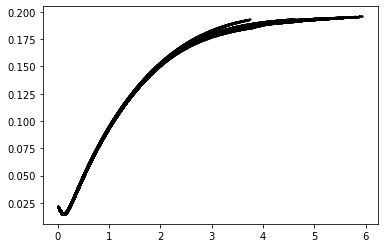

pxt*NEH = 0.111 real_NEH= 25 ratio = 0.00444 

vals 0.05816549366558765

 _TFVVQGFGNVGLHSMR_3 Time 3 ==================================>


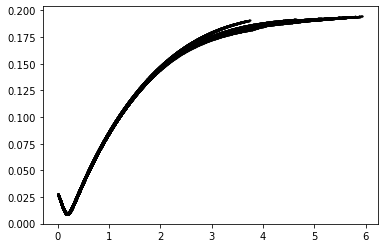

pxt*NEH = 0.183 real_NEH= 25 ratio = 0.00732 

vals 0.14249168512041474

 _TFVVQGFGNVGLHSMR_3 Time 6 ==================================>


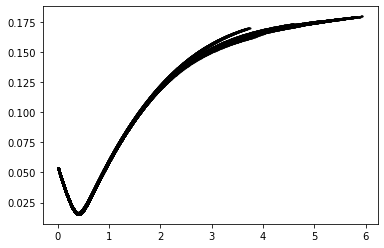

pxt*NEH = 0.4012 real_NEH= 25 ratio = 0.016048 

vals 0.25495827417318945

 _TFVVQGFGNVGLHSMR_3 Time 7 ==================================>


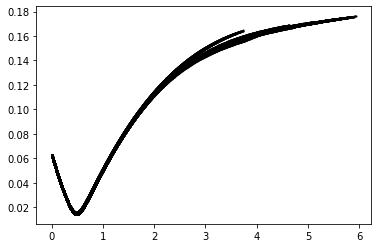

pxt*NEH = 0.48790000000000006 real_NEH= 25 ratio = 0.019516000000000002 

vals 0.3421775845882161

 _TFVVQGFGNVGLHSMR_3 Time 9 ==================================>


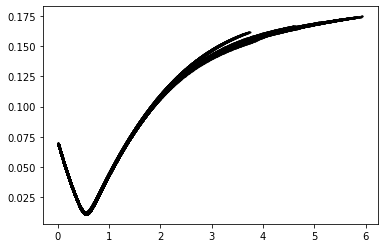

pxt*NEH = 0.5474 real_NEH= 25 ratio = 0.021896 

vals 0.45878463287823706

 _TFVVQGFGNVGLHSMR_3 Time 13 ==================================>


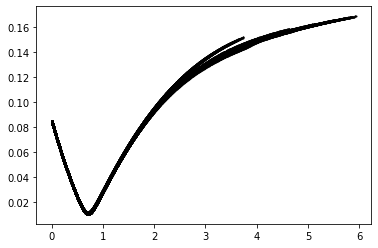

pxt*NEH = 0.713999643 real_NEH= 25 ratio = 0.02855998572 

vals 0.5763239105427803

 _TFVVQGFGNVGLHSMR_3 Time 16 ==================================>


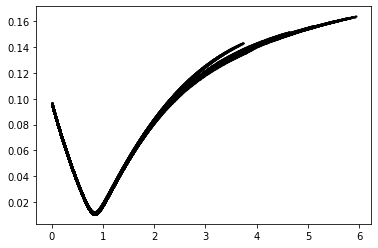

pxt*NEH = 0.83999925 real_NEH= 25 ratio = 0.03359997 

vals 0.6869171913208701

 _TFVVQGFGNVGLHSMR_3 Time 21 ==================================>


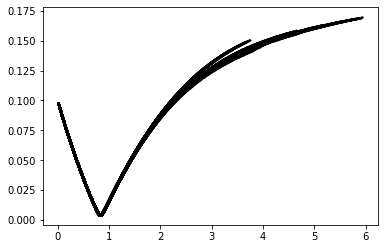

pxt*NEH = 0.81899896 real_NEH= 25 ratio = 0.032759958400000004 

vals 0.8001985710789746

 _TFVVQGFGNVGLHSMR_3 Time 24 ==================================>


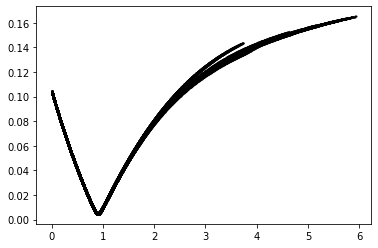

pxt*NEH = 0.90749925 real_NEH= 25 ratio = 0.03629997 

vals 0.8817616388034311

 _TFVVQGFGNVGLHSMR_3 Time 31 ==================================>


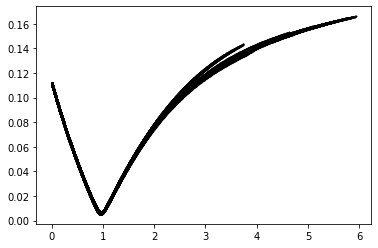

pxt*NEH = 0.94810513 real_NEH= 25 ratio = 0.0379242052 

vals 1.0908069994048968

 [0.027, 0.111, 0.183, 0.4012, 0.48790000000000006, 0.5474, 0.713999643, 0.83999925, 0.81899896, 0.90749925, 0.94810513]


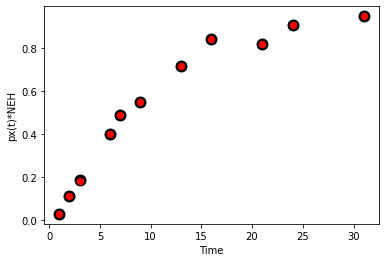

************** RMSE= 0.00046317468243623643 R square= 0.9999978472980577
[0.027299999999999998, 0.1113, 0.18269999999999997, 0.40109999999999996, 0.48719999999999997, 0.5481, 0.7140000000000001, 0.84, 0.819, 0.9072, 0.9471]

 estimated NEH 21


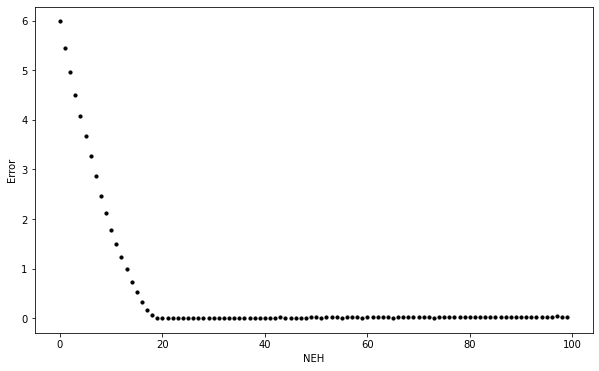


True NEH = 25 	 estimated NEHs median 21




 _VTGKPISQGGIHGR_3 Time 1 ==================================>


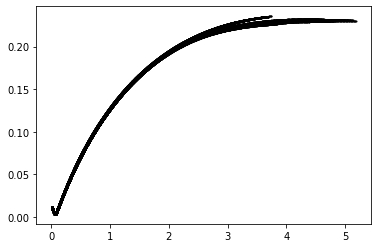

pxt*NEH = 0.06 real_NEH= 26 ratio = 0.0023076923076923075 

vals 0.06008300020651673

 _VTGKPISQGGIHGR_3 Time 2 ==================================>


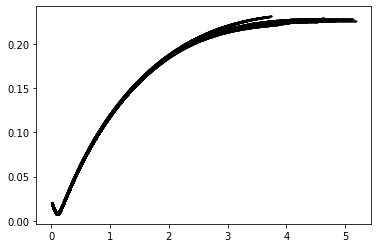

pxt*NEH = 0.099 real_NEH= 26 ratio = 0.003807692307692308 

vals 0.07597883365335212

 _VTGKPISQGGIHGR_3 Time 3 ==================================>


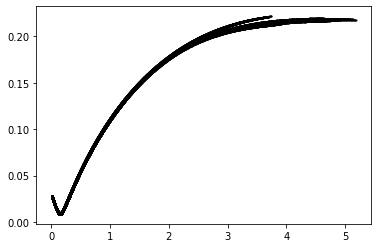

pxt*NEH = 0.1457 real_NEH= 26 ratio = 0.005603846153846154 

vals 0.11160009075959412

 _VTGKPISQGGIHGR_3 Time 6 ==================================>


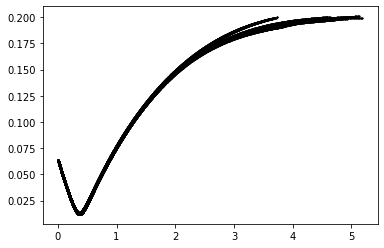

pxt*NEH = 0.37079999999999996 real_NEH= 26 ratio = 0.014261538461538461 

vals 0.2743028287053083

 _VTGKPISQGGIHGR_3 Time 7 ==================================>


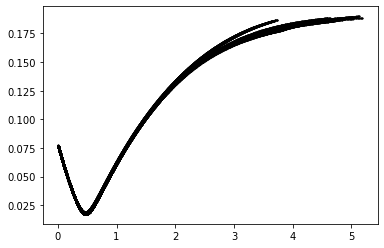

pxt*NEH = 0.4738 real_NEH= 26 ratio = 0.01822307692307692 

vals 0.3073986148114086

 _VTGKPISQGGIHGR_3 Time 9 ==================================>


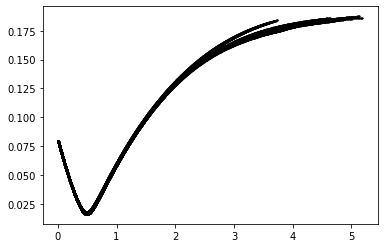

pxt*NEH = 0.49439989700000003 real_NEH= 26 ratio = 0.019015380653846156 

vals 0.3696919831654534

 _VTGKPISQGGIHGR_3 Time 13 ==================================>


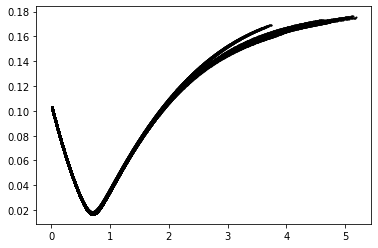

pxt*NEH = 0.700399588 real_NEH= 26 ratio = 0.026938445692307692 

vals 0.46890105106600305

 _VTGKPISQGGIHGR_3 Time 16 ==================================>


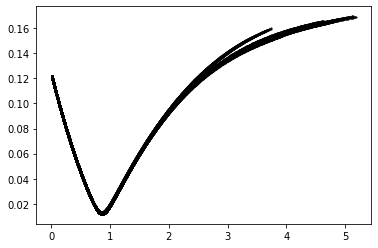

pxt*NEH = 0.8624992499999999 real_NEH= 26 ratio = 0.033173048076923076 

vals 0.7214500526871536

 _VTGKPISQGGIHGR_3 Time 21 ==================================>


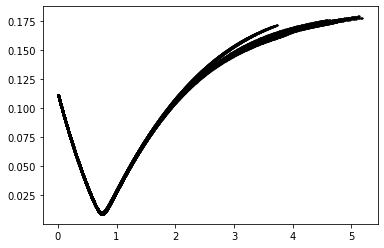

pxt*NEH = 0.751899485 real_NEH= 26 ratio = 0.028919210961538464 

vals 0.6149031989603139

 _VTGKPISQGGIHGR_3 Time 24 ==================================>


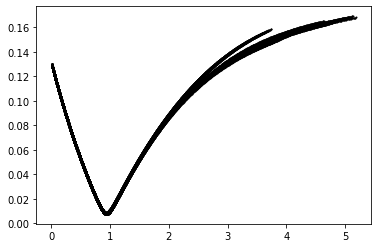

pxt*NEH = 0.93749925 real_NEH= 26 ratio = 0.036057663461538464 

vals 0.7734313559419944

 _VTGKPISQGGIHGR_3 Time 31 ==================================>


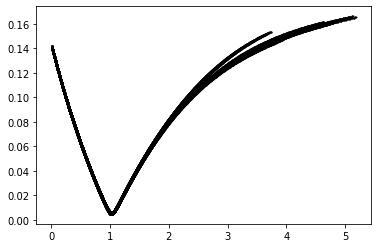

pxt*NEH = 1.0164046199999999 real_NEH= 26 ratio = 0.03909248538461538 

vals 1.1406271985053305

 [0.06, 0.099, 0.1457, 0.37079999999999996, 0.4738, 0.49439989700000003, 0.700399588, 0.8624992499999999, 0.751899485, 0.93749925, 1.0164046199999999]


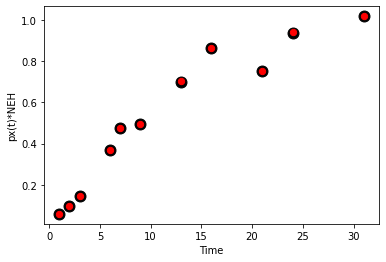

************** RMSE= 0.0005266237154983552 R square= 0.9999974036443494
[0.0598, 0.0989, 0.1449, 0.3703, 0.4738, 0.49449999999999994, 0.7015, 0.8624999999999999, 0.7521, 0.9384000000000001, 1.0166000000000002]

 estimated NEH 23


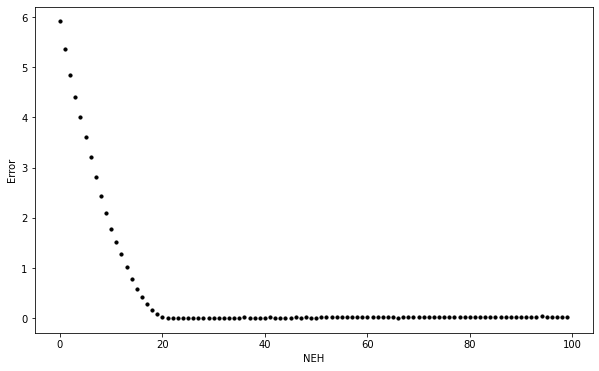


True NEH = 26 	 estimated NEHs median 23




 _VTGKPISQGGIHGR_4 Time 1 ==================================>


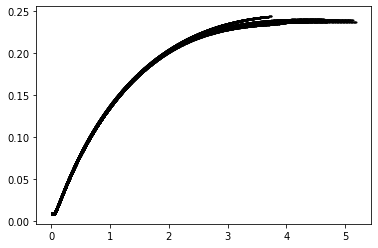

pxt*NEH = 0.02839996 real_NEH= 26 ratio = 0.0010923061538461538 

vals 0.07817200912994773

 _VTGKPISQGGIHGR_4 Time 2 ==================================>


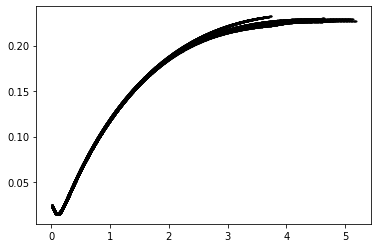

pxt*NEH = 0.105 real_NEH= 26 ratio = 0.0040384615384615385 

vals 0.03545930493411392

 _VTGKPISQGGIHGR_4 Time 3 ==================================>


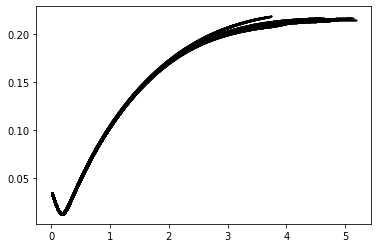

pxt*NEH = 0.177 real_NEH= 26 ratio = 0.006807692307692307 

vals 0.13623079875555222

 _VTGKPISQGGIHGR_4 Time 6 ==================================>


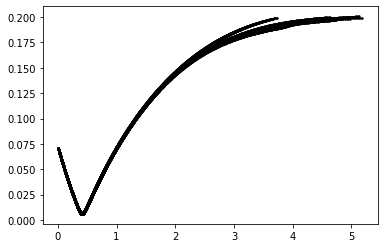

pxt*NEH = 0.4141 real_NEH= 26 ratio = 0.015926923076923078 

vals 0.44005150769663554

 _VTGKPISQGGIHGR_4 Time 7 ==================================>


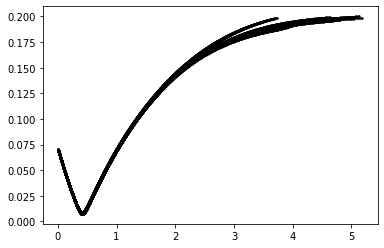

pxt*NEH = 0.41600010400000004 real_NEH= 26 ratio = 0.016000004 

vals 0.3672665620157558

 _VTGKPISQGGIHGR_4 Time 9 ==================================>


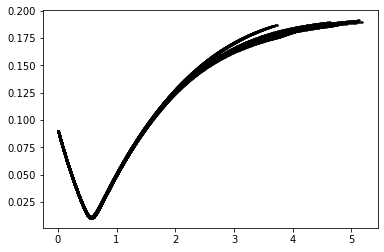

pxt*NEH = 0.5699998000000001 real_NEH= 26 ratio = 0.021923069230769233 

vals 0.447920748030668

 _VTGKPISQGGIHGR_4 Time 13 ==================================>


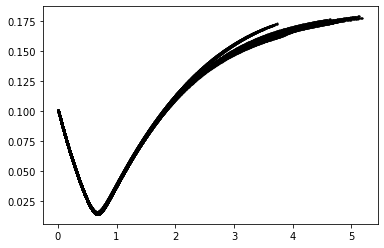

pxt*NEH = 0.673199592 real_NEH= 26 ratio = 0.025892292 

vals 0.5311693916514246

 _VTGKPISQGGIHGR_4 Time 16 ==================================>


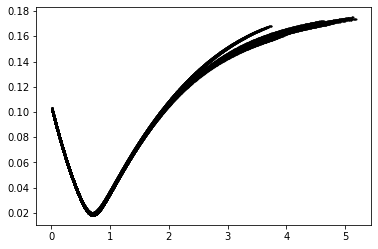

pxt*NEH = 0.700399588 real_NEH= 26 ratio = 0.026938445692307692 

vals 0.4781880997655316

 _VTGKPISQGGIHGR_4 Time 21 ==================================>


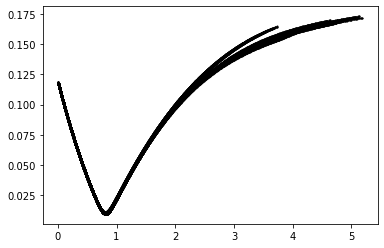

pxt*NEH = 0.813699382 real_NEH= 26 ratio = 0.03129613007692308 

vals 0.8156752917338052

 _VTGKPISQGGIHGR_4 Time 24 ==================================>


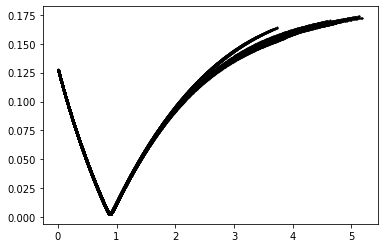

pxt*NEH = 0.88619874 real_NEH= 26 ratio = 0.034084566923076924 

vals 0.8753183808581897

 _VTGKPISQGGIHGR_4 Time 31 ==================================>


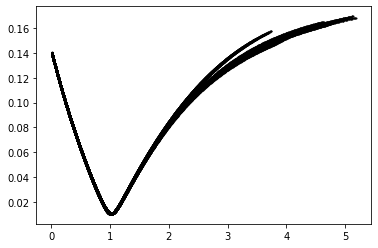

pxt*NEH = 1.01010504 real_NEH= 26 ratio = 0.038850193846153847 

vals 0.8838770813805571

 [0.02839996, 0.105, 0.177, 0.4141, 0.41600010400000004, 0.5699998000000001, 0.673199592, 0.700399588, 0.813699382, 0.88619874, 1.01010504]


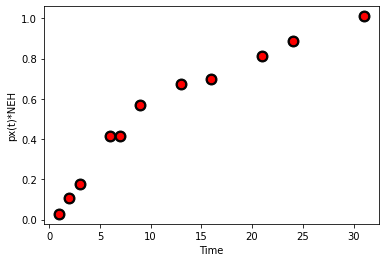

************** RMSE= 0.0004966935180633902 R square= 0.9999974688815959
[0.0286, 0.10559999999999999, 0.176, 0.4136, 0.4158, 0.5698, 0.6732, 0.6996, 0.814, 0.8866, 1.0098]

 estimated NEH 22


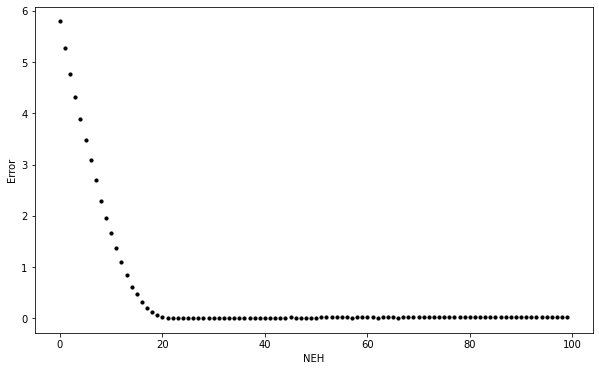


True NEH = 26 	 estimated NEHs median 22




 _YSTDVSVDEVK_2 Time 1 ==================================>


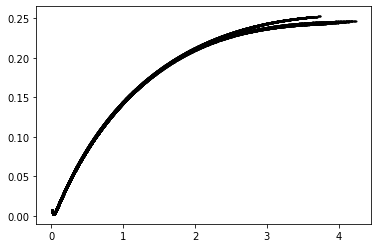

pxt*NEH = 0.0337 real_NEH= 15 ratio = 0.0022466666666666668 

vals 0.05064308772430299

 _YSTDVSVDEVK_2 Time 2 ==================================>


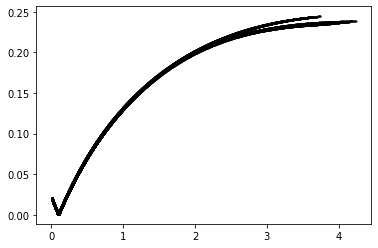

pxt*NEH = 0.09340044 real_NEH= 15 ratio = 0.006226696 

vals 0.10750137174902345

 _YSTDVSVDEVK_2 Time 3 ==================================>


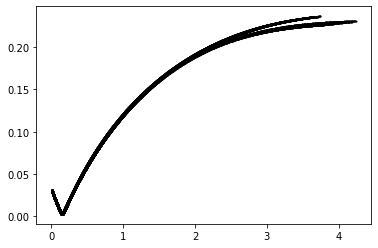

pxt*NEH = 0.147 real_NEH= 15 ratio = 0.0098 

vals 0.14059031530651322

 _YSTDVSVDEVK_2 Time 6 ==================================>


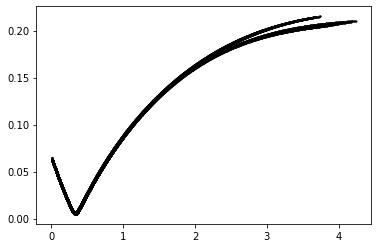

pxt*NEH = 0.33200008300000006 real_NEH= 15 ratio = 0.02213333886666667 

vals 0.30460947069723004

 _YSTDVSVDEVK_2 Time 7 ==================================>


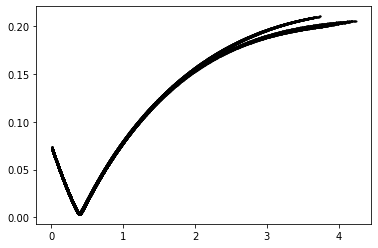

pxt*NEH = 0.388799919 real_NEH= 15 ratio = 0.0259199946 

vals 0.3734100694687574

 _YSTDVSVDEVK_2 Time 9 ==================================>


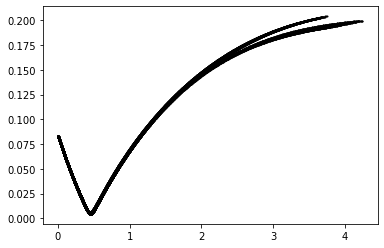

pxt*NEH = 0.456499834 real_NEH= 15 ratio = 0.030433322266666667 

vals 0.42745504142405316

 _YSTDVSVDEVK_2 Time 13 ==================================>


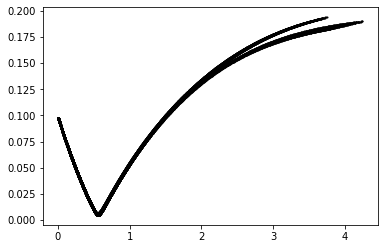

pxt*NEH = 0.56099966 real_NEH= 15 ratio = 0.037399977333333334 

vals 0.5355141272564099

 _YSTDVSVDEVK_2 Time 16 ==================================>


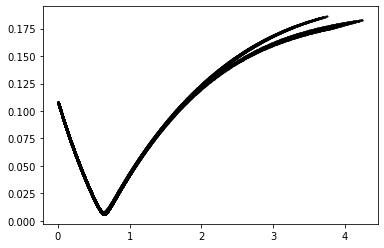

pxt*NEH = 0.645999575 real_NEH= 15 ratio = 0.04306663833333334 

vals 0.5851853490274306

 _YSTDVSVDEVK_2 Time 21 ==================================>


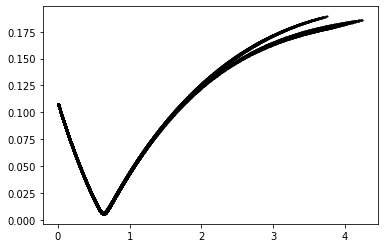

pxt*NEH = 0.637499575 real_NEH= 15 ratio = 0.042499971666666664 

vals 0.5845116419706808

 _YSTDVSVDEVK_2 Time 24 ==================================>


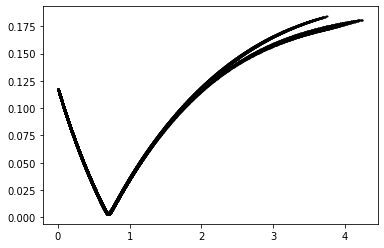

pxt*NEH = 0.70399944 real_NEH= 15 ratio = 0.046933296 

vals 0.7316247453041914

 _YSTDVSVDEVK_2 Time 31 ==================================>


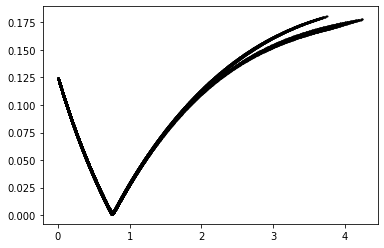

pxt*NEH = 0.75040352 real_NEH= 15 ratio = 0.05002690133333333 

vals 0.7893809901739125

 [0.0337, 0.09340044, 0.147, 0.33200008300000006, 0.388799919, 0.456499834, 0.56099966, 0.645999575, 0.637499575, 0.70399944, 0.75040352]


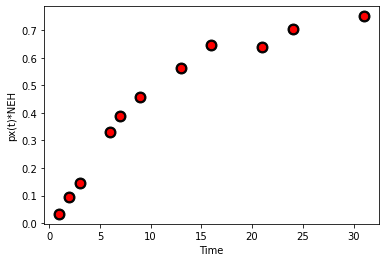

************** RMSE= 0.00046856250339405724 R square= 0.999996267383641
[0.034, 0.0935, 0.1462, 0.3315, 0.3893, 0.4573, 0.561, 0.646, 0.6375, 0.7038, 0.7497]

 estimated NEH 17


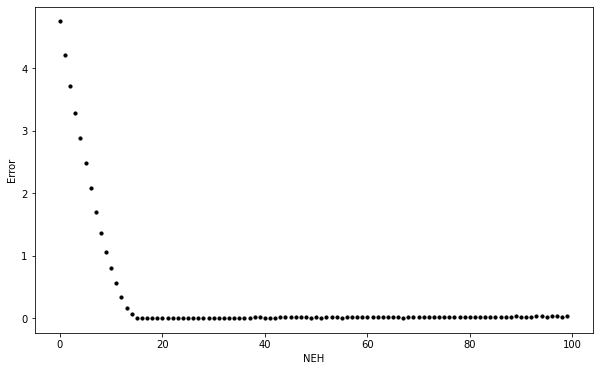


True NEH = 15 	 estimated NEHs median 17





In [82]:
vals=[]
temp_kk=[]
temp_neh=[]
# protien="FAS_MOUSE"
# protien="CPSM_MOUSE"
# protien="CPT2_MOUSE"
# protien="CSAD_MOUSE"
protien="DHE3_MOUSE"
for pep in pept:
    neh_coll=[]
    pxt_neh=[]
    for time in times:
        try:
            print(f"\n {pep} Time",time,"==================================>")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AcVDTALENLSTLK_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DAMLENQTPELFQDVNKPK_3_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DcMLGMEFSGR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_{time}_FAS_MOUSE.csv")
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DTSFEQHVLLHTGGK_3_{time}_FAS_MOUSE.csv") 
    #         data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_EGGFLLVHTVLK_2_{time}_FAS_MOUSE.csv") 
            data=pd.read_csv(f"C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/{pep}_{time}_{protien}.csv")

            data["const"]=data.NEH*data.pxt
            data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) ) )
            data["new_neh"]=data.const/data.new_pxt
            data=data.sort_values(by=["RMSE"],ascending=True)
            data=data[data.NEH<=data.NH]

            plt.scatter(data.const,data.RMSE,s=1,c='k')
#             plt.hlines(y=2.5*min(data.RMSE),xmin=min(data.const),xmax=max(data.const),color='r')
            plt.show()
            
            print("pxt*NEH =",float(data[data.RMSE==min(data.RMSE)].const),"real_NEH=",data.T_NEH[0], "ratio =",float(data[data.RMSE==min(data.RMSE)].const/data.T_NEH[0]),"\n")
            print("vals",(data.loc[0,"exp_t_A1/A0"]-data.loc[0,"exp_A1/A0"])*(1-ph))
            
            pxt_neh.append(float(data[data.RMSE==min(data.RMSE)].const))
#             if(not islinear(data[["const","RMSE"]])):
            tempdata=data[data.RMSE<2.5*min(data.RMSE)]
            tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
            tempdata["pxt_dif"]=((abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2)**0.5 #(abs((tempdata.pxt) - (tempdata.new_pxt))) 
            tempdata=tempdata.sort_values(by=["pxt_dif"])
#             print(data.T_NEH[0],np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            neh_coll=neh_coll+list(np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5)))
            
        except:
            print("Error",time)

#     print(neh_coll)
    print("\n",pxt_neh)
    temp_kk.append(pxt_neh)
    temp_neh.append(data.T_NEH[0])
    
#     plt.hist(neh_coll,color='k',bins=50)
#     print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",np.median(neh_coll))
    eneh=estimateneh(pxt_neh)
    print("\nTrue NEH =",data.T_NEH[0],"\t estimated NEHs median",eneh)
#     vals.append([pep,data.T_NEH[0],np.median(neh_coll)])
    vals.append([pep,data.T_NEH[0],eneh])
    print("===============================================================\n")
    print("===============================================================\n")
    print("===============================================================\n")

In [83]:
res=pd.DataFrame(vals,columns=["Peptieds","True NEH","Estimated NEH"])
res["diff"]=abs(res["True NEH"]-res["Estimated NEH"])
res=res.dropna()
res.sort_values(by="diff").head(50)

,Peptieds,True NEH,Estimated NEH,diff
0,_AGGVTVSYFEWLK_2,17,17,0
3,_DSNYHLLMSVQESLER_2,33,33,0
2,_DIVHSGLAYTMER_3,24,23,1
1,_DDGSWEVIEGYR_2,23,25,2
7,_HGGTIPVVPTAEFQDR_2,32,30,2
8,_HGGTIPVVPTAEFQDR_3,32,30,2
9,_LQHGSILGFPK_3,19,21,2
11,_RDDGSWEVIEGYR_3,27,25,2
15,_YSTDVSVDEVK_2,15,17,2
6,_GVFHGIENFINEASYM_2,30,27,3


In [84]:
print( float(res[["diff"]].mean()),float(res[["diff"]].median()),float(res[["diff"]].std()))

2.4375 2.0 1.3647344063956182


In [85]:
temp_kk


[[0.123,
  0.186,
  0.261,
  0.37370000000000003,
  0.393900101,
  0.550799796,
  0.673199592,
  0.6674994000000001,
  0.76959926,
  0.72419949,
  0.846599286],
 [0.063,
  0.13019999999999998,
  0.217,
  0.453899911,
  0.5631997360000001,
  0.631899555,
  0.827699288,
  0.94499925,
  0.92559911,
  1.0199985,
  1.1249985],
 [0.033,
  0.108,
  0.20700000000000002,
  0.4386,
  0.5149998969999999,
  0.576799794,
  0.731299485,
  0.89249925,
  0.8786992929999999,
  0.9860051999999999,
  1.01220504],
 [0.21,
  0.3927,
  0.591599884,
  1.0199985,
  1.0124985,
  1.1999985,
  1.4324985,
  1.5449977499999998,
  1.3949984999999998,
  1.44539781,
  1.64410451],
 [0.0682,
  0.165,
  0.255,
  0.554599882,
  0.7020996429999999,
  0.84679942,
  1.0274985,
  1.2524985,
  1.2044985400000001,
  1.34899858,
  1.44710783],
 [0.066,
  0.162,
  0.276,
  0.606899881,
  0.7020996429999999,
  0.85839942,
  1.0799985,
  1.2899985,
  1.2749985000000001,
  1.4318995700000001,
  1.51900806],
 [0.08400028,
  0.21050

In [87]:
temp_neh

[17, 23, 24, 33, 33, 37, 30, 32, 32, 19, 19, 27, 25, 26, 26, 15]

In [ ]:
# data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_AAMLGQEDPPQHGLPR_3_24_FAS_MOUSE.csv")
data=pd.read_csv("C:/Workplace/C++/d2ome_v2/v2/v2/bin/Debug/_DPETLLGYSMVGcQR_2_24_FAS_MOUSE.csv")
# data=pd.read_csv("data/_DTSFEQHVLLHTGGK_3_21_FAS_MOUSE.csv")
data.head()

In [ ]:

ph

In [ ]:
# data["const"]=data.NEH*data.pxt
# data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
# data["new_neh"]=data.const/data.new_pxt
# data=data.sort_values(by="RMSE",ascending=True)
# data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]

# # data["temp"]= (data.new_neh*data.new_pxt)/( (1-ph)*(1-ph-data.new_pxt) )
# # data["temp2"]=(data["exp_t_A1/A0"]-data["theo_A1/A0"])

# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
# data.head(290)

In [ ]:
data["const"]=data.NEH*data.pxt
data["new_pxt"]=1-ph- (data.const/( (1-ph)*(data["exp_t_A1/A0"]-data["theo_A1/A0"]) ) )
data["new_neh"]=data.const/data.new_pxt
data=data.sort_values(by=["RMSE"],ascending=True)

data["test"]= 1-ph-data.pxt == (data.NEH*data.pxt)/( (1-ph)*(data["exp_t_A1/A0"]-data["exp_A1/A0"]) )

data=data[(data.new_pxt>0) & (data.new_neh>0) & (data.new_neh<118)]



# data["h1"]=data.NEH*data.pxt
# data["h2"]=data.new_neh*data.new_pxt
data.head(20)

In [ ]:
# np.dot(data[["NEH","pxt"]][318],data[["new_pxt","new_neh"]][318])/(norm(data[["NEH","pxt"]][318])*norm(data[["new_pxt","new_neh"]][318]))

from sklearn.decomposition import PCA

pca = PCA() # Compute PCA
pca.fit_transform(  data[["const","RMSE"]])
eigenvalues = pca.explained_variance_ # Get eigenvalues
eigenvalues = np.round(eigenvalues, 8) # Round off eigenvalues
eigenvalues

In [ ]:
from matplotlib import pyplot as plt
# plt.figure(figsize=(15,6))
plt.scatter(data.const,data.RMSE,s=1)
print(data[data.new_pxt<0].shape)

In [ ]:
tempdata=data[data.RMSE<2*min(data.RMSE)]
tempdata=tempdata[(tempdata.new_pxt>0) & (tempdata.new_neh>0) & (tempdata.new_neh<data.NH[0])]
tempdata["pxt_dif"]=(abs((tempdata.pxt) - (tempdata.new_pxt))) #(abs((tempdata.pxt) - (tempdata.new_pxt)))**2 + (abs((tempdata.NEH) - (tempdata.new_neh)))**2 
tempdata.sort_values(by=["pxt_dif"]).head(25)

In [ ]:
plt.figure(figsize=(15,6))
plt.scatter(tempdata.const,tempdata.RMSE,s=1)

In [ ]:
np.array(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
np.median(tempdata.sort_values(by=["pxt_dif"]).new_neh.head(5))

In [ ]:
# plt.scatter(range(0,6),[3.94E+06,6.30E+06,8.23E+06,6.51E+06,3.99E+06,3.33E+06])

In [ ]:
# plt.scatter(range(0,6),[4.77E+07,9.92E+07,1.11E+08,9.49E+07,5.45E+07,2.81E+07])

In [ ]:
np.array([0.2475, 0.47250000000000003, 0.345, 1.3425, 0.9825, 1.2075, 1.0725, 1.1925000000000001, 1.1775, 1.1175, 1.335])/75

In [ ]:
np.array([[0.16119999999999998, 0.3952, 0.41340000000000005, 0.9229999999999999, 0.9776, 0.9672, 1.0842, 1.183, 1.0608, 1.1258, 1.0972]])/26